# Experimentations (not serious)

In [ ]:
import requests

def main():
    resp = requests.get("https://api.cryptowat.ch/markets/kraken/btcusd/orderbook")
    orderbook = resp.json()['result']
    print (orderbook)

if __name__ == '__main__':
    main()

In [ ]:
import requests
import pandas as pd

def main():
    resp = requests.get("https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1575158400&to=1575244800")
    data = resp.json()
    df = pd.DataFrame(data, columns=['Time','Open', 'High','Low','Close'])
    df['Time'] = pd.to_datetime(df['Time'],infer_datetime_format=True)
    df.set_index('Time', inplace=True)
    return df

if __name__ == '__main__':
    main()


In [ ]:
main()

In [ ]:
resp = requests.get("https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1575158400&to=1575244800")
data = resp.json()['prices'][0]
df = pd.DataFrame(data)
df

In [ ]:
import json

url = 'https://api.cryptowat.ch/markets/binance/btceur/ohlc'
resp = requests.get(url)
resp.raise_for_status()
data = json.loads(resp.content)
data
#df = pd.DataFrame(data['result']['3600'])
#df.head()


In [ ]:
import requests
from pandas.io.json import json_normalize
import pandas as pd 

url = "https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1575158400&to=1575244800"
#url = 'https://api.coingecko.com/api/v3/coins/link/market_chart?vs_currency=usd&days=200'
resp = requests.get(url)
resp.json()

In [ ]:
    url = "https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1532995200&to=1596067200"
    # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
    # parse json into py dict
    resp = json.loads(resp.content)
    type(resp)

In [ ]:
import requests

def main():
    resp = requests.get("https://api.cryptowat.ch/markets/kraken/btcusd/ohlc")
    orderbook = resp.json()['result']
    print (orderbook)

if __name__ == '__main__':
    main()


In [ ]:
two_years = (pd.Timestamp.now() - pd.offsets.Day(730))
print(two_years)
print(pd.Timestamp.now())

In [ ]:
before = '2018-07-31'
after = '2020-07-30'

print(str(int(pd.Timestamp(before).timestamp())))
print(str(int(pd.Timestamp(after).timestamp())))

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
# https://defiexplore.com/api/all-vauls
# ALL VAULTS HISTORICAL DATA (NEEDS WORK)

import requests
import pandas as pd

def get_liquidations():
    url = "https://defiexplore.com/api/all-vaults"
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # # df expects list
    df = pd.DataFrame(resp)
    df.set_index('timestamp', inplace=True)
    return df

In [ ]:
https://defiexplore.com/api/cdps/10775

Useful messari API:

- https://data.messari.io/api/v1/assets/btc/metrics/market-data
- https://data.messari.io/api/v1/assets/metrics = metric definitions for timeseries data

In [ ]:
# THIS IS TO SEARCH MESSARI TIMESERIES 
# METRIC IDS and definitions

import json
url = "https://data.messari.io/api/v1/assets/metrics"
        # get data from endpoint and load json content
resp = requests.get(url)
resp.raise_for_status()
        # parse json into py dict
        # this is a list
resp = json.loads(resp.content)
df = json_normalize(resp, record_path=[['data','metrics']],meta=['status'],errors='ignore')
data = dict(df)
df = pd.DataFrame(data)

df[['description','metric_id','values_schema']]

In [ ]:
# FUNCTION TO GET MESSARI TIMESERIES 

def get_messari_timeseries(request, asset, from_date='2018-07-31', to_date='2020-07-30',interval='1d' ):
    url = "https://data.messari.io/api/v1/assets/{asset}/metrics/{request}/time-series?start={from_date}&end={to_date}&interval=1d".format(
        asset=asset,request=request,from_date=from_date, to_date=to_date)
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['data']['values']
    # # df expects list
    df = pd.DataFrame(resp, columns=['datetime',f'{asset}_{request}'])
    # change date format
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    # set df index to date
    df.set_index('datetime', inplace=True)
    return df


In [ ]:
get_messari_timeseries('real.vol','btc').tail()

In [ ]:


def get_listexchange_bycoin():
    url = "https://api.coinpaprika.com/v1/coins/link-chainlink/exchanges"
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    df = json_normalize(resp)
    # df expects list
    return df

In [ ]:
get_coinlist().head()

In [ ]:
url = 'https://min-api.cryptocompare.com/data/exchange/histoday?tsym=USD&limit=10'
        # get data from endpoint and load json content
resp = requests.get(url)
resp.raise_for_status()
        # parse json into py dict
        # this is a list
resp = json.loads(resp.content)['Data']
#type(resp)

# creates df and flattens json
df = pd.DataFrame(resp)
df.head()

In [ ]:
df.info()

In [ ]:
import requests
from pandas.io.json import json_normalize
import pandas as pd 
import json

#def get_markets_bycoin(asset,):

url = "https://api.coinpaprika.com/v1/coins/link-chainlink/markets"
        # get data from endpoint and load json content
resp = requests.get(url)
resp.raise_for_status()
        # parse json into py dict
        # this is a list
resp = json.loads(resp.content)
#type(resp)

# creates df and flattens json
df = json_normalize(resp)
#df.head()
df = df[['exchange_name','pair','quotes.USD.volume_24h','quote_currency_name']]

In [ ]:
df.head()

In [ ]:
# df.head()
pair = df[['exchange_name','pair','quotes.USD.volume_24h','adjusted_volume_24h_share']].groupby(by='pair')
pair.first()

In [ ]:
type(df)

In [ ]:
# SUPER IMPORTANT
# CODE TO flattening JSON objects of arbitrary structure
# WORKS FOR ONE COLUMN, NOT ALL DATAFRAME
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

In [ ]:
# THEN USE THIS 
# ONLY FOR ONE COLUMN
flat = flatten_json(sample_object2)
json_normalize(flat)

---

---

# FUNCTIONS TO FETCH DATA

data sources:
- santiment
- coingecko
- defiexplore
- 0xtracker
- uniswap
- kyber
- alethio
- glassnode
- coinmetrics

**@todo to be added:** 
- defipulse data aggregator
- blocklytics
- messari
- loanscan - defi rates
- **aave - liquidations**

top data sources: for high grade analysis
- santiment
- glassnode
- coinmetrics
- defipulse = gas and defi metrics
- codefi (future)

to explore: 
- nomics
- bitquery/bloxy.info
- graphql interfaces > aave, uniswap, vulcanize


In [5]:
# IMPORT ALL PACKAGES
import requests
from pandas.io.json import json_normalize
import pandas as pd 
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Santiment

Used for: 

- token information 
- token distribution 
- daily asset pricing metrics
- hourly asset pricing metrics 
- on-chain volumes 
- exchange volumes 
- exchange balances 
- on-chain trading activity

Source data dictionaries and glossary:
- https://github.com/santiment/sanpy#available-metrics
- https://academy.santiment.net/sansheets/functions/
- https://academy.santiment.net/glossary/ 
- https://academy.santiment.net/metrics/

Data types: 
- time series: https://academy.santiment.net/metrics/details/data-type#timeseries-data
- histogram/categorical: https://academy.santiment.net/metrics/details/data-type#histogram-data 

---

search data and metadata

In [208]:
import san
# san.ApiConfig.api_key = 'xauqgnp4uvwk4u7c_a5x7oyk6zj5bcyzn'
# san.ApiConfig.api_key = 'ei6x55qxlf45vw7j_l55jsmq4ku55biai'
# san.ApiConfig.api_key = 'xauqgnp4uvwk4u7c_a5x7oyk6zj5bcyzn'
san.ApiConfig.api_key = 'phagx4qcxbcx4eca_sqjmwfh7q2fojtot'

In [7]:
# SEARCH AVAILABLE DATA FUNC

# search for available metric in api, given slug (aka token) and search term
def search_metric(slug,search_term):
    metric_list = []
    santiment = san.available_metrics_for_slug(slug)
    for i in santiment:
        if search_term in i:
            metric_list.append(i)
    print('source: santiment')
    return metric_list

In [ ]:
# select data point to fetch
# Running as single func (project, term)
search_metric('chainlink','hold')

In [ ]:
# check availability of data since
san.available_metric_for_slug_since(metric='active_deposits', slug='chainlink')

In [177]:
# check query complexity
def get_metric_complexity(request, from_date='2018-07-31', to_date='2020-07-31',interval='1h'):
    df = san.metric_complexity(
        f'{request}',
        from_date=from_date,
        to_date=to_date,
        interval=interval
    )
    print('source: santiment')
    print(f'complexity score: {df}')
    return f'Too complex for free plan: {df > 20000}' 

Time series data

In [198]:
# IMPORTANT TIME SERIES FUNCTION
# interval - The interval of the returned data - an integer followed by one of: s, m, h, d or w

# This allows to create a ts df for a given metric
def get_metric_timeseries(request, asset,from_date='2018-07-31', to_date='2020-07-31',interval='1d'):
    df = san.get(
        f'{request}/{asset}',
        from_date=from_date,
        to_date=to_date,
        interval=interval
    )
    # if no col named value, renaming ignored
    df = df.rename(columns={'value':f'{asset}_{request}'})
    # print data source
    print(f'source: santiment') 
    return df

In [10]:
# IMPORTANT TIME SERIES DF JOIN FUNCTION

# This can be improved to include more df (*args)
# This allows to .join timeseries dfs on common index (datetime)
def aggregate_timeseries_df(df,df1,df2):
    # join df on indexes (datetime)
    df = df.join(df1).join(df2)
    return df

In [ ]:
# IMPORTANT DIRECT CALL TO SANPY API

san.get('ohlcv/chainlink').head()
# ALTERNATIVE BUT SAME
get_metric_timeseries('ohlcv','chainlink').head()

In [ ]:
df = get_metric_timeseries('supply_on_exchanges','chainlink')
df.dtypes

In [ ]:
df['chainlink_supply_on_exchanges'] = df['chainlink_supply_on_exchanges'].astype('int')
df['chainlink_supply_on_exchanges'].plot(figsize=(15,7))

In [12]:
# csv top holders holding 
# Breaks down the number of addresses based on the amount of LINK they hold
def get_distro_holdhist():
    df_distro_hold = pd.read_csv('data/token_holder_distro_chainlink.csv',
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])                 
    return df_distro_hold

In [11]:
# Get historical balance of address - team treasury
# args: request (historical_balance), asset, address, from, to,interval
def get_addbal_timeseries(request, asset, address, from_date='2018-07-31', to_date='2020-07-31',interval='1d'):
    df = san.get(
        f'{request}/{asset}',
        address=f'{address}',
        from_date=from_date,
        to_date=to_date,
        interval=interval
    )
    # if no col named value, renaming ignored
    df = df.rename(columns={'value':f'{asset}_{request}'})
    df = df.rename(columns={'balance':f'balance_{address[:7]}'})
    # print data source
    print(f'source: santiment') 
    return df

non time series or histogram data

In [13]:
# FUNCTION FOR NON TIMESERIES REQUESTS
# Static
def get_nonts_metric(request='projects',requestgroup='all'):
    df = san.get(
        f'{request}/{requestgroup}'
    )
    return df

In [14]:
# FUNCTION TO AGG NON TIMESERIES
# This can be improved to include more df (*args)
# This allows to .join timeseries dfs on common index (key)
def aggregate_nonts_df(df,df1):
    # join df on indexes (key column)
    # add suffix if duplicate col names
    df = df.join(df1, lsuffix='left')
    return df

## Messari API

Used for: 
- trading real volume 
- 

In [15]:
# documentation: 
# Function to get all metric ids from messari (used for ts data)
def get_messari_metrics():
        url = 'https://data.messari.io/api/v1/assets/metrics'
        resp = requests.get(url)
                # get data from endpoint and load json content
        resp.raise_for_status()
                # parse json into py dict
                # this is a list
        resp = json.loads(resp.content)['data']['metrics']
        # df expects list
        df = pd.DataFrame(resp)
        # df = json_normalize(resp)
        df = df[['metric_id','description','minimum_interval','values_schema']]
        df.set_index('metric_id', inplace=True)
        return df

In [ ]:
df = get_messari_metrics()
df.head()

In [16]:
# Function to get all messari timeseries data
# Required args: assetkey (e.g. chainlink), metricid
# If more than one col value this may break!

# documentation: https://messari.io/api/docs#operation/Get%20Asset%20timeseries
# args: start (YYYY-MM-DD), end (YYYY-MM-DD)
# interval "1m" "5m" "15m" "30m" "1h" "1d" "1w"

def get_messari_ts(assetkey, metricid,interval='1d', start='2018-07-31', end='2020-07-31'):
    url = 'https://data.messari.io/api/v1/assets/{assetkey}/metrics/{metricid}/time-series'.format(assetkey=assetkey, metricid=metricid)
    resp = requests.get(url, params={
        'start': f'{start}',
        'end': f'{end}',
        'interval':f'{interval}'
    })
        # get data from endpoint and load json content
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['data']['values']
    # df expects list
    df = pd.DataFrame(resp, columns=['datetime',f'{metricid}'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    df.set_index('datetime', inplace=True)
    return df

In [ ]:
df = get_messari_ts('chainlink','real.vol',end='2020-08-12')
df['real.vol'] = df['real.vol'].astype('int')

In [ ]:
df.tail()

--- 

## Coinpaprika 

Used for: 
- 

## Cryptocompare

Used for: 
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
- daily_ohlcv
- hourly_ohlcv
- daily_trading_volume_by_exchange (and token pair)
- hourly-trading_volume_by_exchange (and token pair)

In [17]:
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistoday
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistohour
# Get open, high, low, close, volumefrom and volumeto from the daily/hourly historical data. 
# arg: symbol (crypto), to_currency (e.g usd), limit=2000 max, before: end date ts
# period: ohlcv either "histoday" (default) or "histohour".

def get_ohlcv_dayorhour(symbol, to_currency, exchange,period='histoday',limit=2000, before='2020-07-31'):
    url = 'https://min-api.cryptocompare.com/data/v2/{period}?fsym={symbol}&tsym={to_currency}'.format(
        symbol=symbol,to_currency=to_currency,period=period)
        # get data from endpoint and load json content
    resp = requests.get(url, params={
        'e': f'{exchange}',
        'limit': f'{limit}',
        'toTs': str(int(pd.Timestamp(before).timestamp()))
    })
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']['Data']
    # df expects list
    df = pd.DataFrame(resp)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df = df.rename(columns={'volumefrom':f'volumefrom_{symbol}_{exchange}'})
    df = df.rename(columns={'volumeto':f'volumeto_{to_currency}_{exchange}'})
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}') 
    return df[['open','close','high','low',f'volumefrom_{symbol}_{exchange}',f'volumeto_{to_currency}_{exchange}']]

In [18]:
# Example get ohlcv
df = get_ohlcv_dayorhour('LINK','BTC','Binance')
df_hour = get_ohlcv_dayorhour('LINK','BTC','Binance',period='histohour')

source: cryptocompare
source: cryptocompare


In [19]:
df.tail()

,open,close,high,low,volumefrom_LINK_Binance,volumeto_BTC_Binance
time,,,,,,
2020-07-27,0.000755,0.000643,0.000756,0.000606,9964760.3,6655.12
2020-07-28,0.000643,0.000663,0.000687,0.000618,5204103.7,3397.08
2020-07-29,0.000663,0.000638,0.000688,0.000620,4127601.2,2679.99
2020-07-30,0.000638,0.000668,0.000686,0.000636,4815836.5,3197.74
2020-07-31,0.000668,0.000688,0.000711,0.000654,4422497.3,3038.82


In [20]:
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
# Get volume total for trading pair from each exchange from the daily/hourly historical data. 
# arg: symbol (crypto), to_currency (e.g usd), limit=2000 max, before: end date ts
# period: ohlcv either "histoday" (default) or "histohour".

def get_exchangevol_dayorhour(symbol, to_currency, exchange,period='histoday',limit=2000, before='2020-07-31'):
    url = 'https://min-api.cryptocompare.com/data/exchange/symbol/{period}?fsym={symbol}&tsym={to_currency}'.format(
        symbol=symbol,to_currency=to_currency,period=period
    )
    resp = requests.get(url, params={
        'e': f'{exchange}',
        'limit': f'{limit}',
        'toTs': str(int(pd.Timestamp(before).timestamp()))
    })
        # get data from endpoint and load json content
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']
    # df expects list
    df = pd.DataFrame(resp)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df = df.rename(columns={'volumefrom':f'volumefrom_{symbol}_{exchange}'})
    df = df.rename(columns={'volumeto':f'volumeto_{to_currency}_{exchange}'})
    df = df.rename(columns={'volumetotal':f'volumetot_{symbol}{to_currency}{exchange}'})
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
df = get_exchangevol_dayorhour('LINK','USD','Binance',before='2020-07-31')
df_hour = get_exchangevol_dayorhour('LINK','USD','Binance',period='histohour',before='2020-07-31')

In [634]:
get_exchangevol_dayorhour('LINK','ETH','uniswap',before='2020-07-31').tail()

source: cryptocompare


,volumefrom_LINK_uniswap,volumeto_ETH_uniswap,volumetot_LINKETHuniswap
time,,,
2020-07-27,193.90,0,193.90
2020-07-28,46.01,0,46.01
2020-07-29,21.38,0,21.38
2020-07-30,25.12,0,25.12
2020-07-31,26.69,0,26.69


In [ ]:
df = get_exchangevol_dayorhour('LINK','BTC','uniswap',before='2020-07-31')
df.tail()

Top trading pair lists

In [21]:
# documentation: https://min-api.cryptocompare.com/documentation?key=Toplists&cat=topPairsEndpoint
# Get top pairs by volume for a coin
# arg: e.g. 
def get_toppairs_vol(symbol, limit=10):
    url = 'https://min-api.cryptocompare.com/data/top/pairs?fsym={symbol}&limit={limit}'.format(
        symbol=symbol,limit=limit)
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']
    # df expects list
    df = pd.DataFrame(resp)
    df['lastUpdateTs'] = pd.to_datetime(df['lastUpdateTs'], unit='s')
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}') 
    return df[['fromSymbol','toSymbol','volume24h','lastUpdateTs']]

In [22]:
get_toppairs_vol('LINK')

source: cryptocompare


,fromSymbol,toSymbol,volume24h,lastUpdateTs
0,LINK,USDT,3.608925e+07,2020-08-16 00:22:51
1,LINK,TUSD,5.725551e+04,2020-08-16 00:18:52
2,LINK,ETH,3.287680e+06,2020-08-16 00:22:39
3,LINK,BIX,5.663583e+02,2020-08-16 00:18:30
4,LINK,BUSD,2.936555e+05,2020-08-16 00:21:44
5,LINK,BTC,1.369614e+07,2020-08-16 00:22:41
6,LINK,USDC,1.770258e+05,2020-08-16 00:20:49
7,LINK,USD,9.490520e+06,2020-08-16 00:22:39
8,LINK,KRW,2.141110e+06,2020-08-16 00:22:16
9,LINK,EUR,1.038963e+06,2020-08-16 00:22:22


In [23]:
api_key = '83e625a6bc3dbda445bd3b9001ba7d6f63ffafc91f75763f4a9b993bb1e2514d'

In [24]:
# Get cryptocompare symbol trading pairs by exchange
# documentation: https://min-api.cryptocompare.com/documentation?key=PairMapping&cat=pairMappingMappedSymbolEndpoint
# NEEDS API_KEY

def get_cc_pairbyexchange(symbol,api_key=api_key):
    url = 'https://min-api.cryptocompare.com/data/v2/pair/mapping/fsym?fsym={symbol}&api_key={api_key}'.format(symbol=symbol,api_key=api_key)
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']['current']
    # df expects list
    df = pd.DataFrame(resp)
    df['last_update'] = pd.to_datetime(df['last_update'], unit='s')
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')    
    return df#[['fromSymbol','toSymbol','volume24h','lastUpdateTs']]b

In [ ]:
df = get_cc_pairbyexchange('LINK')
df.head()

---

## Coingecko

Used for: 

token:
- ohlcv daily of coins

exchanges/markets:
- list of all exchanges
- list of exchanges/markets coin is listed
- exchange volume by ticker or coin
- exchange total volume historical


Snapshot/static metrics

In [25]:
# Static
# Returns the coin pairs, exchanges where coin traded and last volumes
# check get_coin_list() for ids
def get_markets_bycoin(asset,exchange_id=''):
    url = 'https://api.coingecko.com/api/v3/coins/{asset}/tickers'.format(asset=asset)
    resp = requests.get(url, params={
        'id': f'{asset}',
        'exchange_ids': f'{exchange_id}'
    })    
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['tickers']
        # df expects list
    df = json_normalize(resp)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df[['coin_id','base','target','market.name','volume','trust_score']]
# df[['base','target','trust_score','volume']].head()

In [ ]:
df = get_markets_bycoin('chainlink')
df.head()

In [26]:
# Documentation: https://www.coingecko.com/en/api/coins/markets
# Get overview market information about token 
# args: asset (e.g.'chainlink'), currency (output in 'usd' by default)

def get_coin_info(asset, currency='usd'):
    url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency={currency}&ids={asset}'.format(asset=asset,currency=currency)
    resp = requests.get(url, params={
        'vs_currency': f'{currency}',
        'ids': f'{asset}'
    })    
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)
        # df expects list
    df = json_normalize(resp)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
df = get_coin_info('chainlink')
df = df[['id','total_supply','circulating_supply','current_price','market_cap','market_cap_rank','total_volume','ath','atl']]
df.melt()
# df.info()

In [27]:
# Static
# Coingecko
# Get full list of coins or full list of exchanges
# arg: "exchanges" OR "coins" 

def get_exchange_or_coinslist(exchanges_coins):
    url = "https://api.coingecko.com/api/v3/{exchanges_coins}/list".format(exchanges_coins=exchanges_coins)
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # df expects list
    df = pd.DataFrame(resp)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
get_exchange_or_coinslist('coins').head()

timeseries

In [28]:
# Timeseries
# THIS IS GOOD!
# TRANSFORM INTO FUNCTION!
# COINGECKO API
# No need for apikeys 

import requests
from pandas.io.json import json_normalize
import pandas as pd 
import json

def get_hist_price(symbol, currency='usd', start='2018-07-31', end='2020-07-31'):

    # api url formatted
    # symbol are {id} 
    url = "https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range?vs_currency={currency}&from={start}&      to={end}".format(symbol=symbol,currency=currency,start=start, end=end)
    # get data from endpoint and load json content
    resp = requests.get(url, params={
        # handle unix timestamps
        'from': str(int(pd.Timestamp(start).timestamp())),
        'to': str(int(pd.Timestamp(end).timestamp()))
        })
    resp.raise_for_status()
    # parse json into py dict
    resp = json.loads(resp.content)

    # set df from json dict
    # use list comprehension to iterate over dict
    df = pd.DataFrame({
        'dates':[x[0] for x in resp['prices']],
        'prices': [x[1] for x in resp['prices']],
        'market_caps': [x[1] for x in resp['market_caps']],
        'total_volumes': [x[1] for x in resp['total_volumes']]
    })
    # change date format
    df['dates'] = pd.to_datetime(df['dates'], unit='ms')
    # set df index to date
    df.set_index('dates', inplace=True)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
get_hist_price('chainlink').tail()

In [ ]:
# search id and symbol at coingecko
df = get_coinlist()
df.loc[df['id'] == 'chainlink']

In [ ]:
# uses coingecko coin id
# note: bitcoin not btc, ethereum not eth
df = get_hist_price('ethereum')

In [ ]:
df.shape

---

## Defiexplore

Used for: 
- liquidations data
- auctions data
- vault history data

Sources:
- liquidations: https://defiexplore.com/api/auctions
- all vaults: https://defiexplore.com/api/all-vaults

Timeseries - liquidations

In [29]:
# GET LIQUIDATIONS DATA

import requests
import pandas as pd

def get_liquidations():
    url = "https://defiexplore.com/api/auctions"
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # # df expects list
    df = pd.DataFrame(resp)
    # df index
    df.set_index('timestamp', inplace=True)
    # print data source
    url = url.split('.')[0]
    print(f'source: {url}')  
    return df

In [30]:
def get_vaults_list():
    url = "https://defiexplore.com/api/all-vaults"
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # # df expects list
    df = pd.DataFrame(resp)
    # df index
    df.set_index('cdpId', inplace=True)
    # print data source
    url = url.split('.')[0]
    print(f'source: {url}')  
    return df

In [ ]:
# PLACEHOLDER FOR ALL-VAULTS DATA
get_liquidations().head()

In [ ]:
liquidations = get_liquidations()
liquidations['profit'].sum()

In [ ]:
liquidations.dtypes.value_counts()

In [ ]:
liquidations.dtypes

In [ ]:
get_vaults_list().head(10)

---

## On-chain DEX

Sources: 
- blocklytics
- 0xtracker
- uniswap
- kyber


### 0x tracker

In [31]:
# get volume from 0x tracker on token
# 0x514910771af9ca656af840dff83e8264ecf986ca = link

def get_0x_tokenvolume(token_add, granularity='day', period='all'):
    url = 'https://api.0xtracker.com/metrics/token'
    resp = requests.get(url, params={
        'granularity': 'day',
        'token': f'{token_add}',
        'period': 'all'
    })
        # resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)
        # # df expects list
    df = json_normalize(resp)
    df.set_index('date', inplace=True)
    
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df

In [ ]:
df = get_0x_tokenvolume('0x514910771af9ca656af840dff83e8264ecf986ca')
df.tail()

### Bancor - FUNCTIONS NOT WORKING

In [35]:
# This kind of works (last few days only)
# But lots of data missing

def get_bancor_token_vol():
    url = 'https://api.bancor.network/0.1/currencies/volumeHistory?toCurrencyCode=eth&fromCurrencyCode=link&timeFrame=year'
    resp = requests.get(url)
    resp = json.loads(resp.content)['data']['data'][::]

    df_bancor_vol = json_normalize(resp)
    df_bancor_vol['timeStamp'] = pd.to_datetime(df_bancor_vol['timeStamp'], unit='ms')
    df_bancor_vol.set_index('timeStamp', inplace=True)
    
    return df_bancor_vol

In [ ]:
get_bancor_token_vol().tail()

In [33]:
# PROBLEM: THIS IS ALWAYS RETURNING 0 VOLUME
# DOES NOT WORK!
def get_bancor_tokenvolume(to_currency, from_currency, timeframe='year', start='2020-01-31', end='2020-07-31'):
    url = 'https://api.bancor.network/0.1/currencies/volumeHistory?toCurrencyCode={to_currency}&fromCurrencyCode={from_currency}&timeFrame={timeframe}'.format(to_currency=to_currency,from_currency=from_currency,timeframe=timeframe)
    resp = requests.get(url)
    resp = json.loads(resp.content)['data']['data'][::]

    df = json_normalize(resp)
    df.to_csv('bancor1.csv')
    df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
    df.set_index('timeStamp', inplace=True)

    return df.head()

In [34]:
# PROBLEM: THIS IS ALWAYS RETURNING 0 VOLUME

# documentation: https://support.bancor.network/hc/en-us/articles/360018984251-Historical-Volume-API
# Get volume data on trading pair from bancor
# toCurrencyCode={currency_symbol}
# fromCurrencyCode={currency_symbol}
# timeFrame={hour, day, week, year}
# startDate={UNIX time in milliseconds}
# endDate={UNIX time in milliseconds}
def get_bancor_tokenvolume(to_currency, from_currency, timeframe='day', start='2018-07-31', end='2020-07-31'):
    url = 'https://api.bancor.network/0.1/currencies/volumeHistory?'
    resp = requests.get(url, params={
        'toCurrencyCode': f'{to_currency}',
        'fromCurrencyCode': f'{from_currency}',
        'timeFrame': f'{timeframe}',
        'startDate': str(int(pd.Timestamp(start).timestamp())),
        'endDate': str(int(pd.Timestamp(end).timestamp()))

    })
        # resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['data']['data'][::]
        # # df expects list
    df = json_normalize(resp)
    # pd.DataFrame(df)
    df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')    
    df.set_index('timeStamp', inplace=True)
    
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df

In [ ]:
df = get_bancor_tokenvolume('eth', 'link', timeframe='day', start='2018-07-31', end='2020-07-31')
df.head()

---

## Coinmetrics

Used for: 
- lots of summary stats
- csv formatted data (API also available but requires PRO key)

Documentation:
- https://github.com/coinmetrics-io?language=python
- https://coinmetrics.io/tools/
- https://docs.coinmetrics.io/info/assets/link > free vs pro tiers
- https://docs.coinmetrics.io/info/metrics > full data dictionary


In [36]:
# Get all the data dictionary and definitions
# for metrics file
df = pd.read_csv('data/coinmetrics_info.csv',
                 na_values=['', '?', '-'],
                 parse_dates=[0],
                 index_col=[0])                 

In [37]:
# summary stats from coinmetrics
df = pd.read_csv('data/coinmetrics_link.csv',
                 na_values=['', '?', '-'],
                 parse_dates=[0],
                 index_col=[0])                 

---

## Alethio

Used for: **DEFI products and rates**
- Defi stats (snapshot and timeseries)
- daily_earn_apr (by platform and token)
- daily_borrow_apr (by platform and token)
- daily_outstanding_debt
- daily_supply


In [ ]:
before = '2018-07-30'
after = '2020-08-05'

print(str(int(pd.Timestamp(before).timestamp())))
print(str(int(pd.Timestamp(after).timestamp())))

Snapshot of rates

In [38]:
# documentation: https://consensys.github.io/codefi-data-fundamental-api-redoc/#tag/DeFi/paths/~1v0~1defi~1snapshot/get

def get_defi_rates_snap():
    url = 'https://api.aleth.io/v0/defi/snapshot'
    resp = requests.get(url)

    resp = requests.get(url) 
    resp.raise_for_status()

    resp = json.loads(resp.content)['data']
            # # df expects list
    df = json_normalize(resp)
    df.set_index('protocol',inplace=True)
    df = df.drop('timestamp',axis='columns')
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df 

In [ ]:
# Example
get_defi_rates_snap().head()

Timeseries data: APR rates / collateral ratios / debt / supply

In [39]:
# documentation: https://docs.aleth.io/api#tag/DeFi/paths/~1v0~1defi~1history/get
# documentation (new): https://consensys.github.io/codefi-data-fundamental-api-redoc/#tag/DeFi/paths/~1v0~1defi~1history/get
# protocols: "maker" "mcd" "compound" "dydx" "bzx" "ddex" "aave" "lendf"
# assets: "eth" "dai" "sai" "usdc" "bat" "zrx" "rep" "wbtc" "knc" "link" "usdt" "susd" "snx" "mkr" "lend" "mana" "imbtc" "usdx" "tusd"
# metric: "earn_apr" "borrow_apr" (by default both)
# granularity: 24 (default: daily)

def get_defi_ratehist(protocol, asset, after='2018-07-31', before=''):
    url = 'https://api.aleth.io/v0/defi/history'
    resp = requests.get(url)

    resp = requests.get(url, params={
        'after': str(int(pd.Timestamp(after).timestamp())),
        'assets':[f'{asset}'],
        # 'metrics': ['borrow_apr'],
        'protocols':f'{protocol}'	
    })
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['data']
        # # df expects list
    resp = json_normalize(resp)['points']
    
    # dataframe split earn 
    df = pd.DataFrame(resp[0],columns=['timestamp',f'{protocol}_earn_apr'])
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df.set_index('timestamp', inplace=True)
    
    # dataframe split borrow
    df1 = pd.DataFrame(resp[1],columns=['timestamp',f'{protocol}_borrow_apr'])
    df1['timestamp'] = pd.to_datetime(df1['timestamp'],unit='s')
    df1.set_index('timestamp', inplace=True)
    
    # get df timeseries
    df2 = df.join(df1)
    
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df2

In [ ]:
get_defi_ratehist('aave','link').head()

In [40]:
# documentation: https://docs.aleth.io/#tag/DeFi/paths/~1v0~1defi~1stats/get
# documentation(new): https://consensys.github.io/codefi-data-fundamental-api-redoc/#tag/DeFi/paths/~1v0~1defi~1stats/get
# metrics: "collateral_ratio" "outstanding_debt" "supply_volume"
# protocol: "maker" "mcd" "compound" "dydx" "bzx" "ddex" "aave" "lendf"
# granularity: default 24 (daily)
# assets: "eth" "dai" "sai" "usdc" "bat" "zrx" "rep" "wbtc" "knc" "link" "usdt" "susd" "snx" "mkr" "lend" "mana" "imbtc" "usdx" "tusd"

def get_defi_protocol_statshist(protocol, asset, after='2018-07-31', before=''):
    url = 'https://api.aleth.io/v0/defi/stats'
    resp = requests.get(url)

    resp = requests.get(url, params={
        'after': str(int(pd.Timestamp(after).timestamp())),
        'assets':[f'{asset}'],
        # 'metrics': ['collateral_ratio', 'outstanding_debt', 'supply_volume'],
        'protocols':f'{protocol}'	
    })
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['data']
        # # df expects list
    resp_cr = json_normalize(resp)['collateral_ratio']
    resp_debt = json_normalize(resp)['outstanding_debt']
    resp_vol = json_normalize(resp)['supply_volume']
    
    # dataframe split cr 
    df = pd.DataFrame(resp_cr[0],columns=['timestamp',f'{protocol}_{asset}_col_ratio'])
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df.set_index('timestamp', inplace=True)
    
    # dataframe split debt
    df1 = pd.DataFrame(resp_debt[0],columns=['timestamp',f'{protocol}_{asset}_outst_debt'])
    df1['timestamp'] = pd.to_datetime(df1['timestamp'],unit='s')
    df1.set_index('timestamp', inplace=True)
    
    # dataframe split supply vol
    df2 = pd.DataFrame(resp_vol[0],columns=['timestamp',f'{protocol}_{asset}_supp_vol'])
    df2['timestamp'] = pd.to_datetime(df2['timestamp'],unit='s')
    df2.set_index('timestamp', inplace=True)

    # get df join timeseries
    df2 = df.join(df1).join(df2)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df2

In [ ]:
# Example
get_defi_protocol_statshist('aave','link').tail()

### MISSING 

- liquidations/defaults from aave
- liquidations/defaults from bzx


## Glassnode

data in json or api:
- daily_new_addresses (by token)
- daily_token_bal_onexchnages (by token)
- daily_token_bal_byexchnages (by token and exchange)


In [41]:
# Get new unique addresses history (by token)
def get_dayunique_add_hist():
    day_new_add = '/Users/william/Scio/maker-dao/Maker-Risk/LINK/data/new-addresses.json'
    df = pd.read_json (day_new_add, date_unit='s')
    df.columns=['datetime','new_unique_add']
    df.set_index('datetime', inplace=True)
    print(f'source: glassnode')
    return df

In [42]:
 # Get gini coeff hist of distribution of tokens over addresses (see definition)
def get_ginicoeff_hist():
    ginicoeff_hist = 'data/gini-coefficient.csv'
    df = pd.read_csv(ginicoeff_hist,
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])
    df.columns=['gini_coef']
    # df = df.rename(columns={'t':'timestamp'})           
    print(f'source: glassnode')                                                 
    return df

In [43]:
# Get total token balance history in exchanges
def get_token_balexch_hist():
    token_bal_exchange = '/Users/william/Scio/maker-dao/Maker-Risk/LINK/data/exchange-balance.json'
    df = pd.read_json (token_bal_exchange, date_unit='s')
    df.columns=['datetime','token_bal_exch']
    df.set_index('datetime', inplace=True)
    print(f'source: glassnode')
    return df

In [44]:
# Get token balance history by exchange (stacked)
def get_token_balbyexch_hist():
    token_balbyexch = 'data/exchange-balance-stacked.csv'
    df = pd.read_csv(token_balbyexch,
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])
    print(f'source: glassnode')                                                 
    return df

## Santiment data dump (TEMPORARY ONLY)

In [231]:
def get_santiment_data_hist():
    santiment_hist = 'data-santiment/santiment_link_daily.csv'
    df = pd.read_csv(santiment_hist,
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])
    # df.columns=['gini_coef']
    # df = df.rename(columns={'t':'timestamp'})           
    print(f'source: santiment')                                                 
    return df

---
# STARTS HERE 

Datasets that need to be sourced: 

- asset price data 
- asset trading volume
    - CEX exchanges 
    - DEX exchanges    
- liquidity 

## Get the data

### Static data

In [45]:
# List of coin ids or exchange ids
# args: "exchanges" or "coins"
# coingecko ref table
get_exchange_or_coinslist('coins').head(2)

source: coingecko


,id,name,symbol
0,01coin,01coin,zoc
1,0-5x-long-algorand-token,0.5X Long Algorand Token,algohalf


**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [46]:
# Token info chapter
# Token allocation info
df_coininfo = get_coin_info('chainlink', currency='usd')
df_coininfo = df_coininfo[['id','total_supply','circulating_supply','current_price','market_cap','market_cap_rank','total_volume','ath','atl']]

source: coingecko


**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [47]:
# Exchanges chapter
# Centralised exchanges

# List exchanges tokens listed + pairs + last volume reported
# Static: latest listed exchanges/pairs/volume by token
df_markets_coin = get_markets_bycoin('chainlink')
df_highestpairs = get_toppairs_vol('LINK', limit=10) # not sure if relevant

# calculate share of vol by exchange (all pairs)
# calculate share of vol by trading pair

source: coingecko
source: cryptocompare


In [ ]:
df_markets_coin.loc[df_markets_coin['market.name'] == 'Uniswap (v2)']
# df.loc[df['id'] == 'chainlink']

In [ ]:
df_markets_coin['market.name'].unique()

In [ ]:
df = get_cc_pairbyexchange('LINK',api_key=api_key)

In [ ]:
df.loc[df['exchange'] == 'uniswap']

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [48]:
# List DeFi lending where token listed - subset of below
# List snapshot rates by defi
df_defi_rates = get_defi_rates_snap() # analysis requires filtering

# Loanscan/defiscore other protcols (CeFi) token listed (e.g.Celsius, Nuo, Argent)
# Calculate avg earn/borrow rate - static

# Filtering
# df_defi_rates.loc[df_defi_rates['asset'] == 'link']

source: aleth


### Daily data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [190]:
search_metric('chainlink','circula')

source: santiment


['circulation',
 'circulation_10y',
 'circulation_180d',
 'circulation_1d',
 'circulation_2y',
 'circulation_30d',
 'circulation_365d',
 'circulation_3y',
 'circulation_5y',
 'circulation_60d',
 'circulation_7d',
 'circulation_90d',
 'dormant_circulation_180d',
 'dormant_circulation_2y',
 'dormant_circulation_365d',
 'dormant_circulation_90d']

In [213]:
# df_tx_voltoken = get_metric_timeseries('transaction_volume','chainlink') #unit: token
# df_tx_volusd = get_metric_timeseries('transaction_volume_usd','chainlink')   #unit: usd
# df_tx_count = get_metric_timeseries('transactions_count','chainlink')
df = get_metric_timeseries('percent_of_total_supply_on_exchanges','chainlink')
len(df)

source: santiment


74

**one-off data dump (remove when fixed)**

In [277]:
# INFO: A FEW METRICS GOT TRIMED IN SANPY CALL 
# One-off santiment data dump
df_santiment_datadump = get_santiment_data_hist()

source: santiment


In [168]:
# INFO: A FEW METRICS GOT TRIMED IN SANPY CALL 
# REPLACED BY SANTIMENT DATA DUMP (TEMPORARY) - df_santiment_datadump = get_santiment_data_hist()

# Token info chapter
# On-chain activity
df_activadd = get_metric_timeseries('daily_active_addresses','chainlink')
df_newuniqueadd = get_dayunique_add_hist() # glassnode
df_deposits = get_metric_timeseries('daily_active_deposits','chainlink')
df_txvolume = get_metric_timeseries('transaction_volume','chainlink')
df_ohlcv = get_metric_timeseries('ohlcv','chainlink') # includes vol and marketcap

# just an alternative
df_ohlcv_cryptocompare = get_ohlcv_dayorhour('LINK','USDC','Binance')

# Asset price returns - use ohlcv closeusd
df_closingprice = get_metric_timeseries('daily_closing_price_usd','chainlink')

# Calculate asset return 1m/3m/6m/12m/24m
# Calculate asset price moving avg

# Ownership concentration (distribution)
# top 10 holders, unit = token_amt
df_amttophold = get_metric_timeseries('amount_in_top_holders','chainlink') 
df_amttopehold_exch = get_metric_timeseries('amount_in_exchange_top_holders','chainlink') 
df_amttopehold_outexch = get_metric_timeseries('amount_in_non_exchange_top_holders','chainlink') 
# Calculate top % of total supply
# Calculate top % of circulating supply
# csv: holder distro: Breaks down the number of addresses based on the amount of LINK they hold
df_distro_hold = get_distro_holdhist() # needs date formatting
# Gini coeff LINK > glassnode charts
df_ginicoeff = get_ginicoeff_hist()

# Treasury funds - since inception
df_treasury1 = get_addbal_timeseries('historical_balance','chainlink',address='0xe0362f7445e3203a496f6f8b3d51cbb413b69be2',from_date='2017-09-15')
df_treasury2 = get_addbal_timeseries('historical_balance','chainlink',address='0x75398564ce69b7498da10a11ab06fd8ff549001c',from_date='2017-09-15')
df_treasury3 = get_addbal_timeseries('historical_balance','chainlink',address='0x5560d001f977df5e49ead7ab0bdd437c4ee3a99e',from_date='2017-09-15')
df_treasury4 = get_addbal_timeseries('historical_balance','chainlink',address='0xdad22a85ef8310ef582b70e4051e543f3153e11f', from_date='2017-09-15')
df_treasury5 = get_addbal_timeseries('historical_balance','chainlink',address='0xbe6977e08d4479c0a6777539ae0e8fa27be4e9d6', from_date='2017-09-15')
df_treasury6 = get_addbal_timeseries('historical_balance','chainlink',address='0xf37c348b7d19b17b29cd5cfa64cfa48e2d6eb8db',from_date='2017-09-15')

# Token velocity and inertia (age consumed)
# age consumed unit: Time passed × Token/Coin amount
# velocity unit: number of times coin/token changes wallet
# age consumed: Tracks the movement of previously idle LINK tokens. The metric shows the amount of LINK changing addresses daily multiplied by the number of days since they last moved. Spikes indicate a significant amount of previously idle LINK tokens moving between addresses.
# Velocity: Shows the average number of times that a single LINK token changes addresses daily. Higher token velocity means that a single token is used more often in daily transactions.
df_ageconsumed = get_metric_timeseries('age_consumed','chainlink') 
df_velocity = get_metric_timeseries('velocity','chainlink')

print('processing done')

source: santiment
source: glassnode
**NOTICE**
daily_active_deposits will be deprecated in version 0.9.0, please use active_deposits instead
source: santiment
source: santiment
source: santiment
source: cryptocompare
source: santiment
source: santiment
source: santiment
source: santiment
source: glassnode
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
processing done


CEX price and trading volume

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [50]:
# INFO: A FEW METRICS GOT TRIMED IN SANPY CALL 
# REPLACED BY SANTIMENT DATA DUMP (TEMPORARY) - df_santiment_datadump = get_santiment_data_hist()

# Exchanges chapter

# Supply on exchanges/liquidity
df_supp_exch = get_metric_timeseries('supply_on_exchanges','chainlink') 
df_perc_supptot_exch = get_metric_timeseries('percent_of_total_supply_on_exchanges','chainlink')
df_supp_outexch = get_metric_timeseries('supply_outside_exchanges','chainlink')

# Exchanges flows
df_exch_inflow = get_metric_timeseries('exchange_inflow','chainlink')
df_exch_outflow = get_metric_timeseries('exchange_outflow','chainlink')
df_exch_bal = get_metric_timeseries('exchange_balance','chainlink')

# Centralised exchanges
# Tokens on exchanges
df_balexch_total = get_token_balexch_hist() # glassnode
df_balexch_byexch = get_token_balbyexch_hist() # glassnode

# Calculated metric percent_of_circulating_supply_on_exchanges
# supply_on_exchanges / circulating_supply = %circulating_supp_exch

# Trading activity (onchain)
df_tx_voltoken = get_metric_timeseries('transaction_volume','chainlink') #unit: token
df_tx_volusd = get_metric_timeseries('transaction_volume_usd','chainlink')   #unit: usd
df_tx_count = get_metric_timeseries('transactions_count','chainlink')

df_tx_realvol = get_messari_ts('chainlink','real.vol')

# Trading volume by pair USD/USDC/BTC/ETH/USDT
# Based on messari "real volume" list
df_binance_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histoday',limit=2000, before='2020-07-31')
df_binance_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histoday',limit=2000, before='2020-07-31')
df_binance_linkusdc = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histoday',limit=2000, before='2020-07-31')
df_binance_linkusdt = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histoday',limit=2000, before='2020-07-31')

df_binanceus_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histoday',limit=2000, before='2020-07-31')
df_binanceusa_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histoday',limit=2000, before='2020-07-31')

df_coinbase_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histoday',limit=2000, before='2020-07-31')
df_coinbase_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histoday',limit=2000, before='2020-07-31')

df_gemini_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histoday',limit=2000, before='2020-07-31')
df_gemini_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histoday',limit=2000, before='2020-07-31')

df_kraken_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histoday',limit=2000, before='2020-07-31')
df_kraken_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histoday',limit=2000, before='2020-07-31')
df_kraken_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histoday',limit=2000, before='2020-07-31')

df_bittrex_linkusdt = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histoday',limit=2000, before='2020-07-31')
df_bittrex_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histoday',limit=2000, before='2020-07-31')
df_bittrex_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histoday',limit=2000, before='2020-07-31')

df_poloniex_linkusdt = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histoday',limit=2000, before='2020-07-31')
df_poloniex_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histoday',limit=2000, before='2020-07-31')

# calculate velocity (use santiment one)

# Decentralised exchanges
# uniswap
df_uniswap_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histoday',limit=2000, before='2020-07-31')

# 0xtracker
# tradeCount / tradeVolume.USD / tradeVolume.token
df_0x_linketh = get_0x_tokenvolume('0x514910771af9ca656af840dff83e8264ecf986ca', granularity='day', period='all')

# kyber (picture)
# bancor (picture)
df_bancor_linketh = get_bancor_token_vol()

print('processing done')

source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: glassnode
source: glassnode
source: santiment
source: santiment
source: santiment
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: 0xtracker


Lending platforms

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [53]:
# Interest rates defi (hist)
# daily borrow/ daily earn
df_aave_rateshist = get_defi_ratehist('aave', 'link', after='2018-07-30', before='')
df_bzx_rateshist = get_defi_ratehist('bzx', 'link', after='2018-07-30', before='')

# Calculate avg earn/borrow rate - historic (1m/3m/6m/12m)

# Outstanding debt, coll ratio and supply volume. unit: token amount
df_aave_debthist = get_defi_protocol_statshist('aave', 'link', after='2018-07-30', before='') 
df_bzx_debthist = get_defi_protocol_statshist('bzx', 'link', after='2018-07-30', before='')

# Calculate avg collateral ratio 1m/3m/6m/12m
# Calculate avg debt 1m/3m/6m/12m
 
print('processing done')

source: aleth
source: aleth
source: aleth
source: aleth
processing done


Defi liquidations/defaults volume

> missing at the moment


### Hourly data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

- asset price
- real volume

In [54]:
# santiment
df = get_metric_timeseries('price_usd','chainlink',interval='1h')

source: santiment


In [55]:
df.head()

,chainlink_price_usd
datetime,
2018-07-31 00:00:00+00:00,0.310593
2018-07-31 01:00:00+00:00,0.301608
2018-07-31 02:00:00+00:00,0.298460
2018-07-31 03:00:00+00:00,0.295463
2018-07-31 04:00:00+00:00,0.295271


In [71]:
# Get pricing data (santiment)
df_ohlcv_hr1 = get_metric_timeseries('ohlcv','chainlink',from_date='2018-07-31', to_date='2018-10-01' ,interval='1h') 
df_ohlcv_hr2 = get_metric_timeseries('ohlcv','chainlink',from_date='2018-10-02', to_date='2018-12-01', interval='1h') 
df_ohlcv_hr3 = get_metric_timeseries('ohlcv','chainlink',from_date='2018-12-02', to_date='2019-02-01', interval='1h') 
df_ohlcv_hr4 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-02-02', to_date='2019-04-01', interval='1h') 
df_ohlcv_hr5 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-04-02', to_date='2019-06-01', interval='1h') 
df_ohlcv_hr6 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-06-02', to_date='2019-08-01', interval='1h')
df_ohlcv_hr7 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-08-02', to_date='2019-10-01', interval='1h')
df_ohlcv_hr8 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-10-02', to_date='2019-12-01', interval='1h')
df_ohlcv_hr9 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-12-02', to_date='2020-02-01', interval='1h')
df_ohlcv_hr10 = get_metric_timeseries('ohlcv','chainlink',from_date='2020-02-02', to_date='2020-04-01', interval='1h')
df_ohlcv_hr11 = get_metric_timeseries('ohlcv','chainlink',from_date='2020-04-02', to_date='2020-06-01', interval='1h')
df_ohlcv_hr12 = get_metric_timeseries('ohlcv','chainlink',from_date='2020-06-02', to_date='2020-07-31', interval='1h')

print('processing done')

source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
processing done


In [73]:
# Pricing concatenations

df_ohlcv_hr = pd.concat([df_ohlcv_hr1,df_ohlcv_hr2,df_ohlcv_hr3,df_ohlcv_hr4,df_ohlcv_hr5,df_ohlcv_hr6,df_ohlcv_hr7,df_ohlcv_hr8,df_ohlcv_hr9, df_ohlcv_hr10,df_ohlcv_hr11, df_ohlcv_hr12])

print(df_ohlcv_hr.shape)

# Deduplications

print(df_ohlcv_hr[df_ohlcv_hr.index.duplicated()].shape)
df_ohlcv_hr = df_ohlcv_hr[~df_ohlcv_hr.index.duplicated(keep='last')]
print(df_ohlcv_hr.shape)

# Index max/min
print(df_ohlcv_hr.index.min())
print(df_ohlcv_hr.index.max())
# Check nulls 
print(len(df_ohlcv_hr))
print(df_ohlcv_hr.count())
print(df_ohlcv_hr.isnull().values.any())

# To avoid reprocessing time
df_ohlcv_hr.to_csv('data_processed/df_ohlcv_hr.csv')

(17563, 6)
(0, 6)
(17563, 6)
2018-07-31 00:00:00+00:00
2020-07-31 23:00:00+00:00
17563
openPriceUsd     17563
closePriceUsd    17563
highPriceUsd     17563
lowPriceUsd      17563
volume           17563
marketcap        17563
dtype: int64
False


In [59]:
# PROCESSING TIME IS LONG!
# This needs to be changed to get exchanges, pairs and datatime as variables to assign to call
# Calls are batched up due to endpoint limits
# Trading volume by pair USD/USDC/BTC/ETH/USDT
# Based on messari "real volume" list

# Binance
df_binance_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2018-07-31')

df_binance_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2018-07-31')

df_binance_linkusdc_hr1 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linkusdc_hr2 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linkusdc_hr3 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linkusdc_hr4 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linkusdc_hr5 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linkusdc_hr6 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linkusdc_hr7 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linkusdc_hr8 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linkusdc_hr9 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linkusdc_hr10 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linkusdc_hr11 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linkusdc_hr12 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linkusdc_hr13 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2018-07-31')

df_binance_linkusdt_hr1 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linkusdt_hr2 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linkusdt_hr3 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linkusdt_hr4 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linkusdt_hr5 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linkusdt_hr6 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linkusdt_hr7 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linkusdt_hr8 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linkusdt_hr9 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linkusdt_hr10 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linkusdt_hr11 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linkusdt_hr12 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linkusdt_hr13 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2018-07-31')

# Binance us and Binance usa
df_binanceus_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-07-31')
df_binanceus_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-05-31')
df_binanceus_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-03-31')
df_binanceus_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-01-31')
df_binanceus_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-11-30')
df_binanceus_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-09-30')
df_binanceus_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-07-31')
df_binanceus_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-05-31')
df_binanceus_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-03-31')
df_binanceus_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-01-31')
df_binanceus_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2018-11-30')
df_binanceus_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2018-09-30')
df_binanceus_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2018-07-31')

df_binanceusa_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-07-31')
df_binanceusa_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-05-31')
df_binanceusa_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-03-31')
df_binanceusa_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-01-31')
df_binanceusa_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-11-30')
df_binanceusa_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-09-30')
df_binanceusa_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-07-31')
df_binanceusa_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-05-31')
df_binanceusa_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-03-31')
df_binanceusa_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-01-31')
df_binanceusa_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2018-11-30')
df_binanceusa_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2018-09-30')
df_binanceusa_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2018-07-31')

# Coinbase
df_coinbase_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-07-31')
df_coinbase_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-05-31')
df_coinbase_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-03-31')
df_coinbase_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-01-31')
df_coinbase_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-11-30')
df_coinbase_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-09-30')
df_coinbase_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-07-31')
df_coinbase_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-05-31')
df_coinbase_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-03-31')
df_coinbase_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-01-31')
df_coinbase_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2018-11-30')
df_coinbase_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2018-09-30')
df_coinbase_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2018-07-31')

df_coinbase_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-07-31')
df_coinbase_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-05-31')
df_coinbase_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-03-31')
df_coinbase_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-01-31')
df_coinbase_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-11-30')
df_coinbase_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-09-30')
df_coinbase_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-07-31')
df_coinbase_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-05-31')
df_coinbase_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-03-31')
df_coinbase_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-01-31')
df_coinbase_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2018-11-30')
df_coinbase_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2018-09-30')
df_coinbase_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2018-07-31')

# Gemini
df_gemini_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-07-31')
df_gemini_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-05-31')
df_gemini_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-03-31')
df_gemini_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-01-31')
df_gemini_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-11-30')
df_gemini_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-09-30')
df_gemini_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-07-31')
df_gemini_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-05-31')
df_gemini_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-03-31')
df_gemini_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-01-31')
df_gemini_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2018-11-30')
df_gemini_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2018-09-30')
df_gemini_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2018-07-31')

df_gemini_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-07-31')
df_gemini_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-05-31')
df_gemini_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-03-31')
df_gemini_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-01-31')
df_gemini_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-11-30')
df_gemini_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-09-30')
df_gemini_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-07-31')
df_gemini_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-05-31')
df_gemini_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-03-31')
df_gemini_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-01-31')
df_gemini_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2018-11-30')
df_gemini_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2018-09-30')
df_gemini_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2018-07-31')

# Kraken
df_kraken_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-07-31')
df_kraken_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-05-31')
df_kraken_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-03-31')
df_kraken_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-01-31')
df_kraken_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-11-30')
df_kraken_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-09-30')
df_kraken_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-07-31')
df_kraken_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-05-31')
df_kraken_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-03-31')
df_kraken_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-01-31')
df_kraken_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2018-11-30')
df_kraken_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2018-09-30')
df_kraken_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2018-07-31')

df_kraken_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-07-31')
df_kraken_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-05-31')
df_kraken_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-03-31')
df_kraken_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-01-31')
df_kraken_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-11-30')
df_kraken_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-09-30')
df_kraken_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-07-31')
df_kraken_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-05-31')
df_kraken_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-03-31')
df_kraken_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-01-31')
df_kraken_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2018-11-30')
df_kraken_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2018-09-30')
df_kraken_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2018-07-31')

df_kraken_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-07-31')
df_kraken_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-05-31')
df_kraken_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-03-31')
df_kraken_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-01-31')
df_kraken_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-11-30')
df_kraken_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-09-30')
df_kraken_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-07-31')
df_kraken_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-05-31')
df_kraken_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-03-31')
df_kraken_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-01-31')
df_kraken_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2018-11-30')
df_kraken_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2018-09-30')
df_kraken_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2018-07-31')

# BitTrex
df_bittrex_linkusdt_hr1 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-07-31')
df_bittrex_linkusdt_hr2 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-05-31')
df_bittrex_linkusdt_hr3 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-03-31')
df_bittrex_linkusdt_hr4 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-01-31')
df_bittrex_linkusdt_hr5 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-11-30')
df_bittrex_linkusdt_hr6 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-09-30')
df_bittrex_linkusdt_hr7 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-07-31')
df_bittrex_linkusdt_hr8 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-05-31')
df_bittrex_linkusdt_hr9 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-03-31')
df_bittrex_linkusdt_hr10 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-01-31')
df_bittrex_linkusdt_hr11 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2018-11-30')
df_bittrex_linkusdt_hr12 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2018-09-30')
df_bittrex_linkusdt_hr13 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2018-07-31')

df_bittrex_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-07-31')
df_bittrex_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-05-31')
df_bittrex_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-03-31')
df_bittrex_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-01-31')
df_bittrex_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-11-30')
df_bittrex_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-09-30')
df_bittrex_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-07-31')
df_bittrex_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-05-31')
df_bittrex_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-03-31')
df_bittrex_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-01-31')
df_bittrex_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2018-11-30')
df_bittrex_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2018-09-30')
df_bittrex_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2018-07-31')

df_bittrex_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-07-31')
df_bittrex_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-05-31')
df_bittrex_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-03-31')
df_bittrex_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-01-31')
df_bittrex_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-11-30')
df_bittrex_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-09-30')
df_bittrex_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-07-31')
df_bittrex_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-05-31')
df_bittrex_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-03-31')
df_bittrex_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-01-31')
df_bittrex_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2018-11-30')
df_bittrex_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2018-09-30')
df_bittrex_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2018-07-31')

# Poloniex
df_poloniex_linkusdt_hr1 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-07-31')
df_poloniex_linkusdt_hr2 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-05-31')
df_poloniex_linkusdt_hr3 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-03-31')
df_poloniex_linkusdt_hr4 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-01-31')
df_poloniex_linkusdt_hr5 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-11-30')
df_poloniex_linkusdt_hr6 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-09-30')
df_poloniex_linkusdt_hr7 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-07-31')
df_poloniex_linkusdt_hr8 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-05-31')
df_poloniex_linkusdt_hr9 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-03-31')
df_poloniex_linkusdt_hr10 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-01-31')
df_poloniex_linkusdt_hr11 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2018-11-30')
df_poloniex_linkusdt_hr12 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2018-09-30')
df_poloniex_linkusdt_hr13 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2018-07-31')

df_poloniex_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-07-31')
df_poloniex_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-05-31')
df_poloniex_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-03-31')
df_poloniex_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-01-31')
df_poloniex_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-11-30')
df_poloniex_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-09-30')
df_poloniex_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-07-31')
df_poloniex_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-05-31')
df_poloniex_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-03-31')
df_poloniex_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-01-31')
df_poloniex_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2018-11-30')
df_poloniex_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2018-09-30')
df_poloniex_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2018-07-31')

# calculate velocity (use santiment one)

# Decentralised exchanges
# uniswap

df_uniswap_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-07-31')
df_uniswap_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-05-31')
df_uniswap_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-03-31')
df_uniswap_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-01-31')
df_uniswap_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-11-30')
df_uniswap_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-09-30')
df_uniswap_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-07-31')
df_uniswap_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-05-31')
df_uniswap_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-03-31')
df_uniswap_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-01-31')
df_uniswap_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2018-11-30')
df_uniswap_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2018-09-30')
df_uniswap_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2018-07-31')

print('processing done')

source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cr

In [60]:
# Concantenations of hourly volume data
# Append data timeseries for each exchange pair to make a single df by pair 

# Binance concatenations
df_binance_linkbtc_hr = pd.concat([df_binance_linkbtc_hr1,df_binance_linkbtc_hr2,df_binance_linkbtc_hr3,df_binance_linkbtc_hr4,df_binance_linkbtc_hr5,df_binance_linkbtc_hr6,df_binance_linkbtc_hr7,df_binance_linkbtc_hr8,df_binance_linkbtc_hr9, df_binance_linkbtc_hr10,df_binance_linkbtc_hr11, df_binance_linkbtc_hr12, df_binance_linkbtc_hr13])
# df_binance_linkbtc_hr[df_binance_linkbtc_hr.index.duplicated()]

df_binance_linketh_hr = pd.concat([df_binance_linketh_hr1,df_binance_linketh_hr2,df_binance_linketh_hr3,df_binance_linketh_hr4,df_binance_linketh_hr5,df_binance_linketh_hr6,df_binance_linketh_hr7,df_binance_linketh_hr8,df_binance_linketh_hr9, df_binance_linketh_hr10,df_binance_linketh_hr11, df_binance_linketh_hr12, df_binance_linketh_hr13])
# df_binance_linketh_hr[df_binance_linketh_hr.index.duplicated()]

df_binance_linkusdc_hr = pd.concat([df_binance_linkusdc_hr1,df_binance_linkusdc_hr2,df_binance_linkusdc_hr3,df_binance_linkusdc_hr4,df_binance_linkusdc_hr5,df_binance_linkusdc_hr6,df_binance_linkusdc_hr7,df_binance_linkusdc_hr8,df_binance_linkusdc_hr9, df_binance_linkusdc_hr10,df_binance_linkusdc_hr11, df_binance_linkusdc_hr12, df_binance_linkusdc_hr13])
# df_binance_linkusdc_hr[df_binance_linkusdc_hr.index.duplicated()]

df_binance_linkusdt_hr = pd.concat([df_binance_linkusdt_hr1,df_binance_linkusdt_hr2,df_binance_linkusdt_hr3,df_binance_linkusdt_hr4,df_binance_linkusdt_hr5,df_binance_linkusdt_hr6,df_binance_linkusdt_hr7,df_binance_linkusdt_hr8,df_binance_linkusdt_hr9, df_binance_linkusdt_hr10,df_binance_linkusdt_hr11, df_binance_linkusdt_hr12, df_binance_linkusdt_hr13])
# df_binance_linkusdt_hr[df_binance_linkusdt_hr.index.duplicated()]

df_binanceus_linkusd_hr = pd.concat([df_binanceus_linkusd_hr1,df_binanceus_linkusd_hr2,df_binanceus_linkusd_hr3,df_binanceus_linkusd_hr4,df_binanceus_linkusd_hr5,df_binanceus_linkusd_hr6,df_binanceus_linkusd_hr7,df_binanceus_linkusd_hr8,df_binanceus_linkusd_hr9, df_binanceus_linkusd_hr10,df_binanceus_linkusd_hr11, df_binanceus_linkusd_hr12, df_binanceus_linkusd_hr13])
# df_binanceus_linkusd_hr[df_binanceus_linkusd_hr.index.duplicated()]

df_binanceusa_linkusd_hr = pd.concat([df_binanceusa_linkusd_hr1,df_binanceusa_linkusd_hr2,df_binanceusa_linkusd_hr3,df_binanceusa_linkusd_hr4,df_binanceusa_linkusd_hr5,df_binanceusa_linkusd_hr6,df_binanceusa_linkusd_hr7,df_binanceusa_linkusd_hr8,df_binanceusa_linkusd_hr9, df_binanceusa_linkusd_hr10,df_binanceusa_linkusd_hr11, df_binanceusa_linkusd_hr12, df_binanceusa_linkusd_hr13])
# df_binanceusa_linkusd_hr[df_binanceusa_linkusd_hr.index.duplicated()]

# Coinbase concatenations
df_coinbase_linkusd_hr = pd.concat([df_coinbase_linkusd_hr1,df_coinbase_linkusd_hr2,df_coinbase_linkusd_hr3,df_coinbase_linkusd_hr4,df_coinbase_linkusd_hr5,df_coinbase_linkusd_hr6,df_coinbase_linkusd_hr7,df_coinbase_linkusd_hr8,df_coinbase_linkusd_hr9, df_coinbase_linkusd_hr10,df_coinbase_linkusd_hr11, df_coinbase_linkusd_hr12, df_coinbase_linkusd_hr13])
# df_coinbase_linkusd_hr[df_coinbase_linkusd_hr.index.duplicated()]

df_coinbase_linketh_hr = pd.concat([df_coinbase_linketh_hr1,df_coinbase_linketh_hr2,df_coinbase_linketh_hr3,df_coinbase_linketh_hr4,df_coinbase_linketh_hr5,df_coinbase_linketh_hr6,df_coinbase_linketh_hr7,df_coinbase_linketh_hr8,df_coinbase_linketh_hr9, df_coinbase_linketh_hr10,df_coinbase_linketh_hr11, df_coinbase_linketh_hr12, df_coinbase_linketh_hr13])
# df_coinbase_linketh_hr[df_coinbase_linketh_hr.index.duplicated()]

# Gemini concatenations
df_gemini_linkusd_hr = pd.concat([df_gemini_linkusd_hr1,df_gemini_linkusd_hr2,df_gemini_linkusd_hr3,df_gemini_linkusd_hr4,df_gemini_linkusd_hr5,df_gemini_linkusd_hr6,df_gemini_linkusd_hr7,df_gemini_linkusd_hr8,df_gemini_linkusd_hr9, df_gemini_linkusd_hr10,df_gemini_linkusd_hr11, df_gemini_linkusd_hr12, df_gemini_linkusd_hr13])
# df_gemini_linkusd_hr[df_gemini_linkusd_hr.index.duplicated()]

df_gemini_linkbtc_hr = pd.concat([df_gemini_linkbtc_hr1,df_gemini_linkbtc_hr2,df_gemini_linkbtc_hr3,df_gemini_linkbtc_hr4,df_gemini_linkbtc_hr5,df_gemini_linkbtc_hr6,df_gemini_linkbtc_hr7,df_gemini_linkbtc_hr8,df_gemini_linkbtc_hr9, df_gemini_linkbtc_hr10,df_gemini_linkbtc_hr11, df_gemini_linkbtc_hr12, df_gemini_linkbtc_hr13])
# df_gemini_linkbtc_hr[df_gemini_linkbtc_hr.index.duplicated()]

# Kraken
df_kraken_linkbtc_hr = pd.concat([df_kraken_linkbtc_hr1,df_kraken_linkbtc_hr2,df_kraken_linkbtc_hr3,df_kraken_linkbtc_hr4,df_kraken_linkbtc_hr5,df_kraken_linkbtc_hr6,df_kraken_linkbtc_hr7,df_kraken_linkbtc_hr8,df_kraken_linkbtc_hr9, df_kraken_linkbtc_hr10,df_kraken_linkbtc_hr11, df_kraken_linkbtc_hr12, df_kraken_linkbtc_hr13])
# df_kraken_linkbtc_hr[df_kraken_linkbtc_hr.index.duplicated()]

df_kraken_linketh_hr = pd.concat([df_kraken_linketh_hr1,df_kraken_linketh_hr2,df_kraken_linketh_hr3,df_kraken_linketh_hr4,df_kraken_linketh_hr5,df_kraken_linketh_hr6,df_kraken_linketh_hr7,df_kraken_linketh_hr8,df_kraken_linketh_hr9, df_kraken_linketh_hr10,df_kraken_linketh_hr11, df_kraken_linketh_hr12, df_kraken_linketh_hr13])
# df_kraken_linketh_hr[df_kraken_linketh_hr.index.duplicated()]

df_kraken_linkusd_hr = pd.concat([df_kraken_linkusd_hr1,df_kraken_linkusd_hr2,df_kraken_linkusd_hr3,df_kraken_linkusd_hr4,df_kraken_linkusd_hr5,df_kraken_linkusd_hr6,df_kraken_linkusd_hr7,df_kraken_linkusd_hr8,df_kraken_linkusd_hr9, df_kraken_linkusd_hr10,df_kraken_linkusd_hr11, df_kraken_linkusd_hr12, df_kraken_linkusd_hr13])
# df_kraken_linkusd_hr[df_kraken_linkusd_hr.index.duplicated()]

# Bittrex
df_bittrex_linkusdt_hr = pd.concat([df_bittrex_linkusdt_hr1,df_bittrex_linkusdt_hr2,df_bittrex_linkusdt_hr3,df_bittrex_linkusdt_hr4,df_bittrex_linkusdt_hr5,df_bittrex_linkusdt_hr6,df_bittrex_linkusdt_hr7,df_bittrex_linkusdt_hr8,df_bittrex_linkusdt_hr9, df_bittrex_linkusdt_hr10,df_bittrex_linkusdt_hr11, df_bittrex_linkusdt_hr12, df_bittrex_linkusdt_hr13])
# df_bittrex_linkusdt_hr[df_bittrex_linkusdt_hr.index.duplicated()]

df_bittrex_linkbtc_hr = pd.concat([df_bittrex_linkbtc_hr1,df_bittrex_linkbtc_hr2,df_bittrex_linkbtc_hr3,df_bittrex_linkbtc_hr4,df_bittrex_linkbtc_hr5,df_bittrex_linkbtc_hr6,df_bittrex_linkbtc_hr7,df_bittrex_linkbtc_hr8,df_bittrex_linkbtc_hr9, df_bittrex_linkbtc_hr10,df_bittrex_linkbtc_hr11, df_bittrex_linkbtc_hr12, df_bittrex_linkbtc_hr13])
# df_bittrex_linkbtc_hr[df_bittrex_linkbtc_hr.index.duplicated()]

df_bittrex_linketh_hr = pd.concat([df_bittrex_linketh_hr1,df_bittrex_linketh_hr2,df_bittrex_linketh_hr3,df_bittrex_linketh_hr4,df_bittrex_linketh_hr5,df_bittrex_linketh_hr6,df_bittrex_linketh_hr7,df_bittrex_linketh_hr8,df_bittrex_linketh_hr9, df_bittrex_linketh_hr10,df_bittrex_linketh_hr11, df_bittrex_linketh_hr12, df_bittrex_linketh_hr13])
# df_bittrex_linketh_hr[df_bittrex_linketh_hr.index.duplicated()]

# Poloniex
df_poloniex_linkusdt_hr = pd.concat([df_poloniex_linkusdt_hr1,df_poloniex_linkusdt_hr2,df_poloniex_linkusdt_hr3,df_poloniex_linkusdt_hr4,df_poloniex_linkusdt_hr5,df_poloniex_linkusdt_hr6,df_poloniex_linkusdt_hr7,df_poloniex_linkusdt_hr8,df_poloniex_linkusdt_hr9, df_poloniex_linkusdt_hr10,df_poloniex_linkusdt_hr11, df_poloniex_linkusdt_hr12, df_poloniex_linkusdt_hr13])
# df_poloniex_linkusdt_hr[df_poloniex_linkusdt_hr.index.duplicated()]

df_poloniex_linkbtc_hr = pd.concat([df_poloniex_linkbtc_hr1,df_poloniex_linkbtc_hr2,df_poloniex_linkbtc_hr3,df_poloniex_linkbtc_hr4,df_poloniex_linkbtc_hr5,df_poloniex_linkbtc_hr6,df_poloniex_linkbtc_hr7,df_poloniex_linkbtc_hr8,df_poloniex_linkbtc_hr9, df_poloniex_linkbtc_hr10,df_poloniex_linkbtc_hr11, df_poloniex_linkbtc_hr12, df_poloniex_linkbtc_hr13])
# df_poloniex_linkbtc_hr[df_poloniex_linkbtc_hr.index.duplicated()]

# Uniswap
df_uniswap_linketh_hr = pd.concat([df_uniswap_linketh_hr1,df_uniswap_linketh_hr2,df_uniswap_linketh_hr3,df_uniswap_linketh_hr4,df_uniswap_linketh_hr5,df_uniswap_linketh_hr6,df_uniswap_linketh_hr7,df_uniswap_linketh_hr8,df_uniswap_linketh_hr9, df_uniswap_linketh_hr10,df_uniswap_linketh_hr11, df_uniswap_linketh_hr12, df_uniswap_linketh_hr13])
# df_uniswap_linketh_hr[df_uniswap_linketh_hr.index.duplicated()]

print('processing done')

processing done


In [61]:
# Deduplications for hourly volume data
# For each concatenation, get duplicated rows, drop duplicates, print new col/row counts. 
# pandas: https://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries

# Binance concatenations
print(df_binance_linkbtc_hr[df_binance_linkbtc_hr.index.duplicated()].shape)
df_binance_linkbtc_hr = df_binance_linkbtc_hr[~df_binance_linkbtc_hr.index.duplicated(keep='last')]
# df_binance_linkbtc_hr = df_binance_linkbtc_hr.drop_duplicates()
print(df_binance_linkbtc_hr.shape)

print(df_binance_linketh_hr[df_binance_linketh_hr.index.duplicated()].shape)
df_binance_linketh_hr = df_binance_linketh_hr[~df_binance_linketh_hr.index.duplicated(keep='last')]
# df_binance_linketh_hr = df_binance_linketh_hr.drop_duplicates()
print(df_binance_linketh_hr.shape)

print(df_binance_linkusdc_hr[df_binance_linkusdc_hr.index.duplicated()].shape)
df_binance_linkusdc_hr = df_binance_linkusdc_hr[~df_binance_linkusdc_hr.index.duplicated(keep='last')]
# printdf_binance_linkusdc_hr= df_binance_linkusdc_hr.drop_duplicates()
print(df_binance_linkusdc_hr.shape)

print(df_binance_linkusdt_hr[df_binance_linkusdt_hr.index.duplicated()].shape)
df_binance_linkusdt_hr = df_binance_linkusdt_hr[~df_binance_linkusdt_hr.index.duplicated(keep='last')]
# df_binance_linkusdt_hr = df_binance_linkusdt_hr.drop_duplicates()
print(df_binance_linkusdt_hr.shape)

print(df_binanceus_linkusd_hr[df_binanceus_linkusd_hr.index.duplicated()].shape)
df_binanceus_linkusd_hr = df_binanceus_linkusd_hr[~df_binanceus_linkusd_hr.index.duplicated(keep='last')]
# df_binanceus_linkusd_hr = df_binanceus_linkusd_hr.drop_duplicates()
print(df_binanceus_linkusd_hr.shape)

print(df_binanceusa_linkusd_hr[df_binanceusa_linkusd_hr.index.duplicated()].shape)
df_binanceusa_linkusd_hr = df_binanceusa_linkusd_hr[~df_binanceusa_linkusd_hr.index.duplicated(keep='last')]
# df_binanceusa_linkusd_hr = df_binanceusa_linkusd_hr.drop_duplicates()
print(df_binanceusa_linkusd_hr.shape)

# Coinbase concatenations
print(df_coinbase_linkusd_hr[df_coinbase_linkusd_hr.index.duplicated()].shape)
df_coinbase_linkusd_hr = df_coinbase_linkusd_hr[~df_coinbase_linkusd_hr.index.duplicated(keep='last')]
# df_coinbase_linkusd_hr = df_coinbase_linkusd_hr.drop_duplicates()
print(df_coinbase_linkusd_hr.shape)

print(df_coinbase_linketh_hr[df_coinbase_linketh_hr.index.duplicated()].shape)
df_coinbase_linketh_hr = df_coinbase_linketh_hr[~df_coinbase_linketh_hr.index.duplicated(keep='last')]
# df_coinbase_linketh_hr = df_coinbase_linketh_hr.drop_duplicates()
print(df_coinbase_linketh_hr.shape)

# Gemini concatenations
print(df_gemini_linkusd_hr[df_gemini_linkusd_hr.index.duplicated()].shape)
df_gemini_linkusd_hr = df_gemini_linkusd_hr[~df_gemini_linkusd_hr.index.duplicated(keep='last')]
# df_gemini_linkusd_hr = df_gemini_linkusd_hr.drop_duplicates()
print(df_gemini_linkusd_hr.shape)

print(df_gemini_linkbtc_hr[df_gemini_linkbtc_hr.index.duplicated()].shape)
df_gemini_linkbtc_hr = df_gemini_linkbtc_hr[~df_gemini_linkbtc_hr.index.duplicated(keep='last')]
# df_gemini_linkbtc_hr = df_gemini_linkbtc_hr.drop_duplicates()
print(df_gemini_linkbtc_hr.shape)

# Kraken
print(df_kraken_linkbtc_hr[df_kraken_linkbtc_hr.index.duplicated()].shape)
df_kraken_linkbtc_hr = df_kraken_linkbtc_hr[~df_kraken_linkbtc_hr.index.duplicated(keep='last')]
# df_kraken_linkbtc_hr = df_kraken_linkbtc_hr.drop_duplicates()
print(df_kraken_linkbtc_hr.shape)

print(df_kraken_linketh_hr[df_kraken_linketh_hr.index.duplicated()].shape)
df_kraken_linketh_hr = df_kraken_linketh_hr[~df_kraken_linketh_hr.index.duplicated(keep='last')]
# df_kraken_linketh_hr = df_kraken_linketh_hr.drop_duplicates()
print(df_kraken_linketh_hr.shape)

print(df_kraken_linkusd_hr[df_kraken_linkusd_hr.index.duplicated()].shape)
df_kraken_linkusd_hr = df_kraken_linkusd_hr[~df_kraken_linkusd_hr.index.duplicated(keep='last')]
# df_kraken_linkusd_hr = df_kraken_linkusd_hr.drop_duplicates()
print(df_kraken_linkusd_hr.shape)

# Bittrex
print(df_bittrex_linkusdt_hr[df_bittrex_linkusdt_hr.index.duplicated()].shape)
df_bittrex_linkusdt_hr = df_bittrex_linkusdt_hr[~df_bittrex_linkusdt_hr.index.duplicated(keep='last')]
# df_bittrex_linkusdt_hr = df_bittrex_linkusdt_hr.drop_duplicates()
print(df_bittrex_linkusdt_hr.shape)

print(df_bittrex_linkbtc_hr[df_bittrex_linkbtc_hr.index.duplicated()].shape)
df_bittrex_linkbtc_hr = df_bittrex_linkbtc_hr[~df_bittrex_linkbtc_hr.index.duplicated(keep='last')]
# df_bittrex_linkbtc_hr = df_bittrex_linkbtc_hr.drop_duplicates()
print(df_bittrex_linkbtc_hr.shape)

print(df_bittrex_linketh_hr[df_bittrex_linketh_hr.index.duplicated()].shape)
df_bittrex_linketh_hr = df_bittrex_linketh_hr[~df_bittrex_linketh_hr.index.duplicated(keep='last')]
# df_bittrex_linketh_hr = df_bittrex_linketh_hr.drop_duplicates()
print(df_bittrex_linketh_hr.shape)

# Poloniex
print(df_poloniex_linkusdt_hr[df_poloniex_linkusdt_hr.index.duplicated()].shape)
df_poloniex_linkusdt_hr = df_poloniex_linkusdt_hr[~df_poloniex_linkusdt_hr.index.duplicated(keep='last')]
# df_poloniex_linkusdt_hr = df_poloniex_linkusdt_hr.drop_duplicates()
print(df_poloniex_linkusdt_hr.shape)

print(df_poloniex_linkbtc_hr[df_poloniex_linkbtc_hr.index.duplicated()].shape)
df_poloniex_linkbtc_hr = df_poloniex_linkbtc_hr[~df_poloniex_linkbtc_hr.index.duplicated(keep='last')]
# df_poloniex_linkbtc_hr = df_poloniex_linkbtc_hr.drop_duplicates()
print(df_poloniex_linkbtc_hr.shape)

# Uniswap
print(df_uniswap_linketh_hr[df_uniswap_linketh_hr.index.duplicated()].shape)
df_uniswap_linketh_hr = df_uniswap_linketh_hr[~df_uniswap_linketh_hr.index.duplicated(keep='last')]
# df_uniswap_linketh_hr = df_uniswap_linketh_hr.drop_duplicates()
print(df_uniswap_linketh_hr.shape)

(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)


In [62]:
# Join all hourly volume data to one df
# Drop price columns (erc20 to usd to be used from df_ohlcv_hr)

# Binance concatenations
df_link_vol_hr = df_binance_linkbtc_hr.drop(columns=['open','close','high','low']).join(
    df_binance_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_1'
).join(
    df_binance_linkusdc_hr.drop(columns=['open','close','high','low']), rsuffix='_2'
).join(
    df_binance_linkusdt_hr.drop(columns=['open','close','high','low']), rsuffix='_3'
).join(
    df_binanceus_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_4'
).join(
    df_binanceusa_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_5'
).join(
# Coinbase concatenations
    df_coinbase_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_6'
).join(
    df_coinbase_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_7'
).join(
# Gemini concatenations
    df_gemini_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_8'
).join(
    df_gemini_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_9'
).join(
# Kraken
    df_kraken_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_10'
).join(
    df_kraken_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_11'
).join(
    df_kraken_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_12'
).join(
# Bittrex
    df_bittrex_linkusdt_hr.drop(columns=['open','close','high','low']), rsuffix='_13'
).join(
    df_bittrex_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_14'
).join(
    df_bittrex_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_15'
).join(
# Poloniex
    df_poloniex_linkusdt_hr.drop(columns=['open','close','high','low']), rsuffix='_16'
).join(
    df_poloniex_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_17'
).join(
# Uniswap
    df_uniswap_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_18'
)

In [63]:
df_link_vol_hr.shape

(19545, 38)

In [64]:
missing_values = df_link_vol_hr.count() != len(df_link_vol_hr)
missing_values

volumefrom_LINK_Binance        False
volumeto_BTC_Binance           False
volumefrom_LINK_Binance_1      False
volumeto_ETH_Binance           False
volumefrom_LINK_Binance_2      False
volumeto_USDC_Binance          False
volumefrom_LINK_Binance_3      False
volumeto_USDT_Binance          False
volumefrom_LINK_binanceus      False
volumeto_USD_binanceus         False
volumefrom_LINK_binanceusa     False
volumeto_USD_binanceusa        False
volumefrom_LINK_Coinbase       False
volumeto_USD_Coinbase          False
volumefrom_LINK_Coinbase_7     False
volumeto_ETH_Coinbase          False
volumefrom_LINK_Gemini         False
volumeto_USD_Gemini            False
volumefrom_LINK_Gemini_9       False
volumeto_BTC_Gemini            False
volumefrom_LINK_Kraken         False
volumeto_BTC_Kraken            False
volumefrom_LINK_Kraken_11      False
volumeto_ETH_Kraken            False
volumefrom_LINK_Kraken_12      False
volumeto_USD_Kraken            False
volumefrom_LINK_BitTrex        False
v

In [69]:
# Set volume dtype to int
df_link_vol_hr = df_link_vol_hr.astype('int').sort_index()

# To avoid reprocessing time
df_link_vol_hr.to_csv('data_processed/link_vol_hr.csv')

In [75]:
# Join pricing hourly pricing and volume data
# Both time in UTC

# Make ohlcv tz non-aware
df_pricevol_hr = df_ohlcv_hr.tz_localize(None).join(
    df_link_vol_hr
)

# Cleaning data

# get dtypes post join
print(df_pricevol_hr.dtypes)
# get df shape before cleaning
print(df_pricevol_hr.shape)

missing_values = df_pricevol_hr.count() != len(df_pricevol_hr)
print(f'values dropped in joined:\n {missing_values}')

# drop rows with nan 
df_pricevol_hr = df_pricevol_hr.dropna()

# set volume dtypes to int
# re-cast original dtypes (volume data) to joined df except dtypes of pricing df (keep float)
cols=[i for i in df_pricevol_hr.columns if i not in ["openPriceUsd","closePriceUsd",'highPriceUsd','lowPriceUsd']]
for col in cols:
    df_pricevol_hr[col]=df_pricevol_hr[col].astype('int')

# Get dtypes post recast
print(df_pricevol_hr.dtypes)
print(df_pricevol_hr.shape)

openPriceUsd                   float64
closePriceUsd                  float64
highPriceUsd                   float64
lowPriceUsd                    float64
volume                         float64
marketcap                      float64
volumefrom_LINK_Binance        float64
volumeto_BTC_Binance           float64
volumefrom_LINK_Binance_1      float64
volumeto_ETH_Binance           float64
volumefrom_LINK_Binance_2      float64
volumeto_USDC_Binance          float64
volumefrom_LINK_Binance_3      float64
volumeto_USDT_Binance          float64
volumefrom_LINK_binanceus      float64
volumeto_USD_binanceus         float64
volumefrom_LINK_binanceusa     float64
volumeto_USD_binanceusa        float64
volumefrom_LINK_Coinbase       float64
volumeto_USD_Coinbase          float64
volumefrom_LINK_Coinbase_7     float64
volumeto_ETH_Coinbase          float64
volumefrom_LINK_Gemini         float64
volumeto_USD_Gemini            float64
volumefrom_LINK_Gemini_9       float64
volumeto_BTC_Gemini      

In [124]:
# Cleaning checks

# Shape changes vol df, pricing df, joined df
print(df_link_vol_hr.shape)
print(df_ohlcv_hr.shape)
print(df_pricevol_hr.shape)

# sum null values by column
print(df_pricevol_hr.isnull().sum())

(19545, 38)
(17563, 6)
(17540, 62)
openPriceUsd                     0
closePriceUsd                    0
highPriceUsd                     0
lowPriceUsd                      0
volume                           0
marketcap                        0
volumefrom_LINK_Binance          0
volumeto_BTC_Binance             0
volumefrom_LINK_Binance_1        0
volumeto_ETH_Binance             0
volumefrom_LINK_Binance_2        0
volumeto_USDC_Binance            0
volumefrom_LINK_Binance_3        0
volumeto_USDT_Binance            0
volumefrom_LINK_binanceus        0
volumeto_USD_binanceus           0
volumefrom_LINK_binanceusa       0
volumeto_USD_binanceusa          0
volumefrom_LINK_Coinbase         0
volumeto_USD_Coinbase            0
volumefrom_LINK_Coinbase_7       0
volumeto_ETH_Coinbase            0
volumefrom_LINK_Gemini           0
volumeto_USD_Gemini              0
volumefrom_LINK_Gemini_9         0
volumeto_BTC_Gemini              0
volumefrom_LINK_Kraken           0
volumeto_BTC_Kraken 

In [123]:
df_pricevol_hr.tail()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,volumefrom_LINK_Binance,volumeto_BTC_Binance,volumefrom_LINK_Binance_1,volumeto_ETH_Binance,...,Sum_volfrom_Link_Coinbase_usd,Sum_volfrom_Link_Gemini_usd,Sum_volfrom_Link_Kraken_usd,Sum_volfrom_Link_BitTrex_usd,Sum_volfrom_Link_Poloniex_usd,Sum_volfrom_Link_uniswap_usd,Sum_volfrom_Link_all,Sum_volfrom_Link_allcex,Sum_volfrom_Link_all_usd,Sum_volfrom_Link_allcex_usd
datetime,,,,,,,,,,,,,,,,,,,,,
2020-07-30 20:00:00,7.508440,7.473369,7.511229,7.449035,604095330,2615679085,187828,126,41323,911,...,1.206262e+06,22479.893380,1.134383e+06,9678.012609,881.857520,859.437413,888215,888100,6.637958e+06,6.637099e+06
2020-07-30 21:00:00,7.475926,7.434110,7.475926,7.424486,609715267,2601938372,94525,63,14598,323,...,6.703411e+05,40902.471200,1.703378e+05,8445.148543,85194.896394,96.643425,465040,465027,3.457158e+06,3.457062e+06
2020-07-30 22:00:00,7.415181,7.399588,7.429917,7.358020,610355008,2589855672,220636,146,18624,408,...,1.087865e+06,77984.254033,1.597201e+05,15835.117528,1798.099794,0.000000,859696,859696,6.361396e+06,6.361396e+06
2020-07-30 23:00:00,7.394573,7.416992,7.455699,7.381593,605829268,2595947041,97316,64,7868,174,...,6.251560e+05,0.000000,1.062632e+05,6430.531674,3612.074885,51.918941,419963,419956,3.114862e+06,3.114810e+06
2020-07-31 00:00:00,7.418091,7.512869,7.518181,7.418091,605605948,2629504207,139034,93,19999,447,...,8.553627e+05,45888.604829,2.977726e+05,21967.629424,3275.610954,420.720673,597078,597022,4.485769e+06,4.485348e+06


In [122]:
df_pricevol_hr.columns

Index(['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd',
       'volume', 'marketcap', 'volumefrom_LINK_Binance',
       'volumeto_BTC_Binance', 'volumefrom_LINK_Binance_1',
       'volumeto_ETH_Binance', 'volumefrom_LINK_Binance_2',
       'volumeto_USDC_Binance', 'volumefrom_LINK_Binance_3',
       'volumeto_USDT_Binance', 'volumefrom_LINK_binanceus',
       'volumeto_USD_binanceus', 'volumefrom_LINK_binanceusa',
       'volumeto_USD_binanceusa', 'volumefrom_LINK_Coinbase',
       'volumeto_USD_Coinbase', 'volumefrom_LINK_Coinbase_7',
       'volumeto_ETH_Coinbase', 'volumefrom_LINK_Gemini',
       'volumeto_USD_Gemini', 'volumefrom_LINK_Gemini_9',
       'volumeto_BTC_Gemini', 'volumefrom_LINK_Kraken', 'volumeto_BTC_Kraken',
       'volumefrom_LINK_Kraken_11', 'volumeto_ETH_Kraken',
       'volumefrom_LINK_Kraken_12', 'volumeto_USD_Kraken',
       'volumefrom_LINK_BitTrex', 'volumeto_USDT_BitTrex',
       'volumefrom_LINK_BitTrex_14', 'volumeto_BTC_BitTrex',
       'vo

In [100]:
# Adding new colums

# Sum volume by exchange (all pairs)

# Get all pairs in list by exchange
col_list_binance= list(df_pricevol_hr[['volumefrom_LINK_Binance','volumefrom_LINK_Binance_1','volumefrom_LINK_Binance_2','volumefrom_LINK_Binance_3','volumefrom_LINK_binanceus','volumefrom_LINK_binanceusa']])
col_list_coinbase= list(df_pricevol_hr[['volumefrom_LINK_Coinbase','volumefrom_LINK_Coinbase_7']])
col_list_gemini= list(df_pricevol_hr[['volumefrom_LINK_Gemini','volumefrom_LINK_Gemini_9']])
col_list_kraken= list(df_pricevol_hr[['volumefrom_LINK_Kraken','volumefrom_LINK_Kraken_11','volumefrom_LINK_Kraken_12']])
col_list_bittrex= list(df_pricevol_hr[['volumefrom_LINK_BitTrex','volumefrom_LINK_BitTrex_14','volumefrom_LINK_BitTrex_15']])
col_list_poloniex= list(df_pricevol_hr[['volumefrom_LINK_Poloniex','volumefrom_LINK_Poloniex_17']])
col_list_uniswap= list(df_pricevol_hr[['volumefrom_LINK_uniswap']])

# Sum rows for cols in list
df_pricevol_hr['Sum_volfrom_Link_Binance'] = df_pricevol_hr[col_list_binance].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Coinbase'] = df_pricevol_hr[col_list_coinbase].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Gemini'] = df_pricevol_hr[col_list_gemini].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Kraken'] = df_pricevol_hr[col_list_kraken].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_BitTrex'] = df_pricevol_hr[col_list_bittrex].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Poloniex'] = df_pricevol_hr[col_list_poloniex].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_uniswap'] = df_pricevol_hr[col_list_uniswap].sum(axis=1)

# Get all volumes in usd (closing usd price)
df_pricevol_hr['Sum_volfrom_Link_Binance_usd'] = df_pricevol_hr['Sum_volfrom_Link_Binance'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Coinbase_usd'] = df_pricevol_hr['Sum_volfrom_Link_Coinbase'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Gemini_usd'] = df_pricevol_hr['Sum_volfrom_Link_Gemini'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Kraken_usd'] = df_pricevol_hr['Sum_volfrom_Link_Kraken'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_BitTrex_usd'] = df_pricevol_hr['Sum_volfrom_Link_BitTrex'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Poloniex_usd'] = df_pricevol_hr['Sum_volfrom_Link_Poloniex'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_uniswap_usd'] = df_pricevol_hr['Sum_volfrom_Link_uniswap'] * df_pricevol_hr['closePriceUsd']

# Get all exchange sums in list

col_list_allexchange= list(df_pricevol_hr[['Sum_volfrom_Link_Binance','Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini','Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex',
'Sum_volfrom_Link_Poloniex','Sum_volfrom_Link_uniswap']])
col_list_allcex= list(df_pricevol_hr[['Sum_volfrom_Link_Binance','Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini','Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex',
'Sum_volfrom_Link_Poloniex']])

# Sum rows for all exchanges (erc20)
df_pricevol_hr['Sum_volfrom_Link_all'] = df_pricevol_hr[col_list_allexchange].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_allcex'] = df_pricevol_hr[col_list_allcex].sum(axis=1)

# Get all volumes all exchanges in usd (closing usd price)
df_pricevol_hr['Sum_volfrom_Link_all_usd'] = df_pricevol_hr['Sum_volfrom_Link_all'] * df_pricevol_hr['closePriceUsd']
df_pricevol_hr['Sum_volfrom_Link_allcex_usd'] = df_pricevol_hr['Sum_volfrom_Link_allcex'] * df_pricevol_hr['closePriceUsd']

In [120]:
df_pricevol_hr.index

DatetimeIndex(['2018-07-31 00:00:00', '2018-07-31 01:00:00',
               '2018-07-31 02:00:00', '2018-07-31 03:00:00',
               '2018-07-31 04:00:00', '2018-07-31 05:00:00',
               '2018-07-31 06:00:00', '2018-07-31 07:00:00',
               '2018-07-31 08:00:00', '2018-07-31 09:00:00',
               ...
               '2020-07-30 15:00:00', '2020-07-30 16:00:00',
               '2020-07-30 17:00:00', '2020-07-30 18:00:00',
               '2020-07-30 19:00:00', '2020-07-30 20:00:00',
               '2020-07-30 21:00:00', '2020-07-30 22:00:00',
               '2020-07-30 23:00:00', '2020-07-31 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17540, freq=None)

--- 

## Join the data

- timeseries data only

### daily

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [278]:
# Token info chapter
# On-chain activity

# Token info

# Join onchain activity data
df_activity_day = df_ohlcv.tz_localize(None).join(
    df_activadd.tz_localize(None)
).join( 
    df_newuniqueadd
# COMMENTED OUT CODE DUE TO ISSUE WITH SANPY
# ).join(
#     df_deposits.tz_localize(None) 

# ).join(
#     df_txvolume.tz_localize(None)
# ).join( 
# Ownership concentration (distribution)
#     df_amttophold.tz_localize(None) 
# ).join(
#     df_amttopehold_exch.tz_localize(None) 
# ).join(
#     df_amttopehold_outexch.tz_localize(None) 
# ).join(
# Token velocity and inertia (age consumed)
#     df_ageconsumed.tz_localize(None) 
# ).join(
#     df_velocity.tz_localize(None)
# )
# TEMPORARY SOLUTION DATA DUMP - REMOVE
).join(
    df_santiment_datadump
)

# Ownership concentration (distribution)
# Distribution/coefficient
df_distrogini_day = df_distro_hold.join(
    df_ginicoeff
)

# Treasury funds - since inception

df_treasury_day = df_treasury1.tz_localize(None).join(
    df_treasury2.tz_localize(None) 
).join( 
    df_treasury3.tz_localize(None) 
).join(     
    df_treasury4.tz_localize(None) 
).join( 
    df_treasury5.tz_localize(None) 
).join( 
    df_treasury6.tz_localize(None)
)

# Missing value checks
df_activity_day.isnull().sum()


openPriceUsd                                       0
closePriceUsd                                      0
highPriceUsd                                       0
lowPriceUsd                                        0
volume                                             0
marketcap                                          0
chainlink_daily_active_addresses                   0
new_unique_add                                     0
Price                                              0
Daily Active Deposits                              0
Transaction Volume                                 0
Amount held by top addresses                       0
Amount held by top exchange addresses              0
Amount held by top non-exchange addresses          0
Age Consumed                                       0
Velocity                                           0
Coin Supply on Exchanges                           0
Coin Supply on Exchanges (as % of total supply)    0
Coin Supply outside of Exchanges              

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

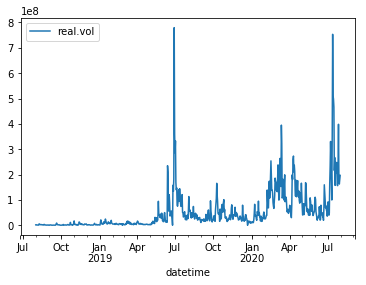

In [275]:
df_tx_realvol.astype('int').plot()

In [ ]:
# Trading volume by pair USD/USDC/BTC/ETH/USDT

# Join all hourly volume data to one df
# Drop price columns (erc20 to usd to be used from df_ohlcv_hr)

# Exchange volume day joins
df_link_cexvol_day = df_binance_linkbtc.drop(columns=['open','close','high','low']).join(
    df_binance_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_1' 
).join(
    df_binance_linketh.drop(columns=['open','close','high','low']), rsuffix='_2' 
).join(
    df_binance_linkusdc.drop(columns=['open','close','high','low']), rsuffix='_3'
).join(
    df_binance_linkusdt.drop(columns=['open','close','high','low']), rsuffix='_4'
).join(
    df_binanceus_linkusd.drop(columns=['open','close','high','low']), rsuffix='_5' 
).join(
    df_binanceusa_linkusd.drop(columns=['open','close','high','low']), rsuffix='_6'
).join(
# Coinbase
    df_coinbase_linkusd.drop(columns=['open','close','high','low']), rsuffix='_7' 
).join(
    df_coinbase_linketh.drop(columns=['open','close','high','low']), rsuffix='_8' 
# Gemini
).join(
    df_gemini_linkusd.drop(columns=['open','close','high','low']), rsuffix='_9' 
).join(
    df_gemini_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_10' 
# Kraken
).join(
    df_kraken_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_11' 
).join(
    df_kraken_linketh.drop(columns=['open','close','high','low']), rsuffix='_12' 
).join(
    df_kraken_linkusd.drop(columns=['open','close','high','low']), rsuffix='_13' 
).join(
# Bittrex
    df_bittrex_linkusdt.drop(columns=['open','close','high','low']), rsuffix='_14' 
).join(
    df_bittrex_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_15' 
).join(    
    df_bittrex_linketh.drop(columns=['open','close','high','low']), rsuffix='_16' 
).join(
# Poloniex
    df_poloniex_linkusdt.drop(columns=['open','close','high','low']), rsuffix='_17' 
).join(
    df_poloniex_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_18'
).join(
# Uniswap
    df_uniswap_linketh.drop(columns=['open','close','high','low']), rsuffix='_18'
)

# DEX trading volumes
df_link_dexvol_day = df_uniswap_linketh.drop(columns=['open','close','high','low']).join(
    df_0x_linketh.drop(columns=['fillCount','fillVolume.USD','fillVolume.token','price.close']), rsuffix='_1' 
).join(
    df_bancor_linketh.drop(columns=['volume.eur']), rsuffix='_2'
)

df_link_dexvol_day = df_link_dexvol_day.rename(columns={'tradeCount':'tradeCount_0x','tradeVolume.USD':'tradeVolume.USD_0x', 'tradeVolume.token': 'tradeVolume.token_0x','volume.eth':'volume.eth_bancor', 'volume.usd': 'volume.usd_bancor'})

In [ ]:
# CEX
df_link_cexvol_day

In [ ]:
# DEX
df_link_dexvol_day

Lending platforms

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [ ]:
# Defi

### hourly

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

- asset price
- real volume

---
---

## Clean data

### Static data

In [ ]:
# All dfs
# Token info
df_coininfo

# Exchanges
df_markets_coin
df_highestpairs

# 3rd party lending
df_defi_rates

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [ ]:
# For visual clarity, pivot table
# pivot table
df_coininfo = df_coininfo.melt()
df_coininfo.set_index('variable', inplace=True)

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [ ]:
# Exchanges chapter
# Centralised exchanges

# List exchanges tokens listed + pairs + last volume reported
df_markets_coin = get_markets_bycoin('chainlink')
df_highestpairs = get_toppairs_vol('LINK', limit=10) # not sure if relevant

# calculate share of vol by exchange (all pairs)
# calculate share of vol by trading pair

### Daily data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

Lending platforms

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding

In [ ]:
# Defi

# df = df.apply(pd.to_numeric, errors='coerce')
# df.loc[df['asset'] == 'link']

# df = get_defi_protocol_statshist('aave','link')
# pd.to_numeric(df['aave_link_supp_vol'],errors='coerce').astype('int').plot()
# df = df.apply(pd.to_numeric, errors='coerce')

### Hourly data

---
---

## Analyse data


### Static data

### Timeseries - daily

### Timeseries - hourly

In [ ]:
# Data ready for analysis
df_pricevol_hr

---
---
## ANALYSIS REPORT

---

## Experimentations

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}eur/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
two_years = (pd.Timestamp.now() - pd.offsets.Day(730))
two_years

In [ ]:
link = get_historic_price('link', 'kraken', after=two_years)
link.head()

In [ ]:
link.describe()

In [ ]:
link['ClosePrice'].plot(figsize=(15,7))

In [ ]:
link['ClosePrice'].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
# 
axy = link['ClosePrice'].plot(kind='density', figsize=(14,6))
axy.axvline(link['ClosePrice'].mean(), color='red')
axy.axvline(link['ClosePrice'].median(), color='green')

In [ ]:
# Distribution since 2020-04
link.loc[link.index > '2020-04-01 01:00:00']['ClosePrice'].plot(kind='density', figsize=(14,6))

In [ ]:
corr = link[['OpenPrice','Volume','ClosePrice']].corr()
corr

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
requests.get?

---

# ANALYSIS


## Auction liquidation data

Only MCD data

```
- collateral    float64     collateral currency e.g. eth
- debt          float64     DAI
- profit        float64     DAI
- soldColl      float64     collateral currency e.g. eth
- soldFor       float64     DAI
```

In [ ]:
# global debt auction stats
liquidations[['debt']].describe()

In [ ]:
liquidations.index.min()

In [ ]:
# debt auction stats by collateral
print('Debt liquidation stats by collateral type')
liquidations[['debt','cdpType']].groupby('cdpType').describe()

In [ ]:
subset = liquidations.loc[liquidations['profit']< 0]
subset['profit'].sum()

In [ ]:
liquidations[['profit', 'debt']].plot(kind='density', figsize=(14,6))

In [ ]:
# Groupby: cdptype debt median
debt_liq = liquidations[['cdpType', 'debt']].groupby('cdpType').median().round(2)
debt_liq
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(debt_liq.index, height=debt_liq.debt)
plt.title('Median Debt Liquidation by Collateral');

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = liquidations.loc[liquidations.cdpType == 'ETH', 'debt']
# x2 = liquidations.loc[liquidations.cdpType == 'BAT', 'debt']
# x3 = liquidations.loc[liquidations.cdpType == 'ZRX', 'debt']
# x3 = liquidations.loc[liquidations.cdpType == 'WBTC', 'debt']
# x3 = liquidations.loc[liquidations.cdpType == 'KNC', 'debt']

kwargs = dict(alpha=0.5, bins=200)

plt.hist(x1, **kwargs, color='g', label='ETH')
# plt.hist(x2, **kwargs, color='b', label='BAT')
# plt.hist(x3, **kwargs, color='r', label='ZRX')
# plt.hist(x3, **kwargs, color='r', label='WBTC')
# plt.hist(x3, **kwargs, color='r', label='KNC')
plt.gca().set(title='Frequency Histogram of Collateral Debt Liquidation (DAI)', ylabel='Frequency')
plt.xlim(-100,10000)
plt.legend();

In [ ]:
import seaborn as sns

x1 = liquidations.loc[liquidations.cdpType=='ETH', ['debt']]
x2 = liquidations.loc[liquidations.cdpType=='BAT', ['debt']]
x3 = liquidations.loc[liquidations.cdpType=='WBTC', ['debt']]
x4 = liquidations.loc[liquidations.cdpType=='KNC', ['debt']]


# plot
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=False, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='ETH')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='BAT')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='WBTC')
sns.distplot(x4 , color="blue", ax=axes[3], axlabel='KNC')

plt.xlim(0,10000);

---
---

# FORUM ANALYSIS POST

## Background

### Protocol summary

- whitepaper abstract
- website overview

### Token use

- whitepaper token description
- website token description

### Governance 

- any information on governance?
- from website

## Token information

### On-chain activity
- https://academy.santiment.net/sansheets/functions/#san_active_deposits
- https://academy.santiment.net/sansheets/functions/#san_active_addresses
- https://studio.glassnode.com/metrics?a=LINK&category=Network%20Stats&m=addresses.NewNonZeroCount
    - daily_active_addresses
    - daily_active_deposits
    - daily_transaction_volume 
    - daily_price
    - ohlcv daily
    - daily_new_unique_addresses

### Token allocation/distribution

sources:
- coingecko
- santiment
- etherscan

data: 
- data
    - initial_supply    
    - current_token_supply
    - circulating supply 
    - market cap
    - daily_price
    - implied market cap (?)

circulating supply (definition by glassnode): 
```
LINK’s circulating supply of 350,000,000, as reported by CoinMarketCap, only counts the tokens sold to the public in the ICO. 

After taking the team sell off into account, the actual circulating supply is closer to ~367,909,600.
```

### Asset price returns

- santiment. raw data:
    - daily_price
    - daily_price

Derived/Calculated variables from daily_price
- asset_price_return_1m
- asset_price_return_3m 
- asset_price_return_6m     
- asset_price_return_12m
- asset_price_return_24m

Other derived from daily_price:
- 200MA_asset_price (EMA)
- 50MA_asset_price (EMA)

article
- https://bravenewcoin.com/insights/chainlink-price-analysis-strong-fundamental-metrics-support-price-gains

### Token ownership concentration (distribution)

sources: 
- etherscan
- santiment
- glassnode

data:
- https://etherscan.io/token/tokenholderchart/0x514910771af9ca656af840dff83e8264ecf986ca?range=100 > top 100 address token ownership
- https://academy.santiment.net/metrics/amount-in-top-holders/ > Token/Coin amount
- https://academy.santiment.net/sansheets/functions/#san_top_holders_percent_of_total_supply
- https://academy.santiment.net/metrics/top-holders/#top-holders-balance
- https://academy.santiment.net/metrics/mean-coin-age/mean-coin-age-technical/#total-age
    - holders_distribution_total > only paid plan
    - amount_in_top_holders
    - amount_in_exchange_top_holders
    - age_distribution

sansheets: 
- SAN_TOP_HOLDERS_PERCENT_OF_TOTAL_SUPPLY

data > glassnode:
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.Balance1PctHolders
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.Gini > gini coeff for LINK
    - Gini Coefficient
    - 1% Richlist Balance

articles:
- https://medium.com/glassnode-insights/on-chain-distribution-analysis-of-chainlink-link-5ee7acb62f62
 

### Treasury funds data?
sources: 
- santiment
- coindesk

team addresses:
- 0xe0362f7445e3203a496f6f8b3d51cbb413b69be2 — Current balance: 50,000,000 LINK
- 0x75398564ce69b7498da10a11ab06fd8ff549001c — Current balance: 50,000,000 LINK
- 0x5560d001f977df5e49ead7ab0bdd437c4ee3a99e — Current balance: 50,000,000 LINK
- 0xdad22a85ef8310ef582b70e4051e543f3153e11f — Current balance: 46,500,000 LINK
- 0xbe6977e08d4479c0a6777539ae0e8fa27be4e9d6 — Current balance: 50,000,000 LINK
- 0xf37c348b7d19b17b29cd5cfa64cfa48e2d6eb8db — Current balance: 35,590,421.01 LINK

data:
- team address?
- https://academy.santiment.net/sansheets/functions/#san_historical_balance
    - historical_balance

ICO distribution: 30 team/35 nodes/35 investors
- https://etherscan.io/token/0x514910771af9ca656af840dff83e8264ecf986ca?a=0xf55037738604fddfc4043d12f25124e94d7d1780 > describes ICO distribution

articles:
- best article: https://medium.com/glassnode-insights/on-chain-distribution-analysis-of-chainlink-link-5ee7acb62f62
- https://bravenewcoin.com/insights/celsius-network-partners-with-chainlink
- https://www.coindesk.com/crypo-lender-celsius-taps-chainlinks-price-oracles-for-interest-rate-decentralization > move "significant" portion of crypto holdings under Celsius’ treasury management service. For interest accrual.
- https://www.prnewswire.com/news-releases/celsius-network-and-chainlink-form-long-term-partnership-to-create-superior-financial-platform-through-decentralization-301031500.html
- https://bravenewcoin.com/insights/chainlink-price-analysis-strong-fundamental-metrics-support-price-gains

### Token age
- https://academy.santiment.net/sansheets/functions/#san_token_age_consumed
- https://academy.santiment.net/sansheets/functions/#san_mean_age
- https://academy.santiment.net/metrics/mean-coin-age/mean-coin-age-technical/#total-age
    - age_consumed > Spikes are signal of a large amount of tokens moving after being idle
    - mean_age 


In [ ]:
    # - percent_of_total_supply_on_exchanges
    # - supply_on_exchanges
df = san.get('prices/chainlink')
df.tail()

In [ ]:
search_metric('chainlink','exchange')

In [ ]:
df

In [ ]:
df = san.get(
    "historical_balance/chainlink",
    address="0xe0362f7445e3203a496f6f8b3d51cbb413b69be2",
    from_date="2018-04-18",
    to_date="2020-07-31",
    interval="1d"
)

## Exchanges 

- https://academy.santiment.net/sansheets/functions/#san_exchange_balance
- https://academy.santiment.net/sansheets/functions/#san_exchange_funds_flow
- https://academy.santiment.net/sansheets/functions/#san_exchange_inflow
- https://academy.santiment.net/sansheets/functions/#san_exchange_outflow 
- https://academy.santiment.net/metrics/supply-on-or-outside-exchanges/#measuring-unit

Note : on-chain metrics
- Liquidity
    - percent_of_total_supply_on_exchanges
    - supply_on_exchanges
    - supply_outside_exchanges
    - exchange_balance
- Flows:
    - exchange_inflow   
    - exchange_outflow

> Do flows correlate to pricing activity?

### Centralised exchanges 

- list exchanges where token listed
- trading volume on **real exchanges** only (see messari definition)

sources: 
- BraveNewCoin
- Coinmarketcap
- coingecko
- messari

data:
- https://www.coingecko.com/en/coins/chainlink#markets
- https://bravenewcoin.com/data-and-charts/assets/LINK/markets

List exchanges, pair, volumes
- exchange_name
- trading_pair e.g. LINK/USD 
- trading_volume

Tokens on exchanges
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.BalanceExchanges
- https://studio.glassnode.com/metrics?a=BTC&m=distribution.BalanceExchangesAll
- https://academy.santiment.net/metrics/supply-on-or-outside-exchanges/#measuring-unit
    - daily_exchange_balance_all (of token)
    - daily_exchange_balance_stacked (of token by exchange)
    - percent_of_total_supply_on_exchanges

- Derived metrics:
    - percent_of_circulating_supply_on_exchanges > calc: supply_on_exchanges / circulating_supply

Note: only addresses known to belong to exchanges


Trading: on-chain 
- https://academy.santiment.net/sansheets/functions/#san_transaction_volume
    - daily_transaction_volume (in token) > on-chain transaction volume

Trading: exchange (volume by pair: USD/USDC/BTC/ETH)
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
    - daily-trading_volume_by_exchange (and token pair)
    - hourly-trading_volume_by_exchange (and token pair)

- Derived metric:
    - Rolling 30d avg volume > calc: 

#### Derived metric > **token velocity**
- https://academy.santiment.net/sansheets/functions/#san_daily_closing_marketcap
- https://academy.santiment.net/sansheets/functions/#san_daily_closing_price
- daily_closing_price_usd
- daily_closing_marketcap_usd
- daily_transaction_volume
    - transaction_volume (in usd) / market_cap > calc: (transaction_volume * closing_price) / closing_marketcap
    
Velocity definition (glassnode):
```
Velocity is a measure of how quickly units are circulating in the network and is calculated by dividing the on-chain transaction volume (in USD) by the market cap, i.e. the inverse of the NVT ratio.
``` 

articles:
- https://messari.io/article/messari-proprietary-methods > method for centralised exchange **real volume** and **exchange selection**


### Decentralised exchanges 

List of decentralised exchanges with LINK

sources:
- etherscan
- messari
- coingecko

data: 
- https://etherscan.io/stat/dextracker
- https://etherscan.io/dextracker
- https://messari.io/asset/chainlink/metrics
    - Transaction Volume (24H, USD) e.g. $551,657,069.67
    - Median Transaction Volume (USD) e.g. $1,286.96

Pools:
- https://uniswap.info/token/0x514910771af9ca656af840dff83e8264ecf986ca
    - Transaction_volume 24h (usd)
    - Transaction_count 24h
    - Total_liquidity

0x:
- https://api.0xtracker.com/tokens/:address
    - tradeCount	
    - tradeVolume.USD	
    - tradeVolume.token


articles: 
- 2019 report on DEXes: https://medium.com/alethio/dex-in-the-2019-a-recap-by-numbers-96d506ba1cb8
- 2019: trade volume on exchages (all) https://public.tableau.com/profile/alethio#!/vizhome/DEXTradesHistory/Dashboard1
- https://messari.io/resource/decentralized-exchanges > dex resources
- https://github.com/econoar/ethhub/blob/master/built-on-ethereum/decentralized-exchanges/README.md > types of DEXs

types: 
- offchain order book (e.g 0x, etherdelta, loopring...)
- p2p (airswap, republic protocol)
- pool based (e.g. kyber, bancor, uniswap) 

### Liquidity pools (e.g.)



## 3rd party lending platforms

### Platforms

sources: 
- coingecko
- defiscore
- loanscan
- alethio api

data: 


articles:
- https://www.binance.com/en/support/articles/73a5d3352ae944fe8e899d2602bee27c > Binance leveraged LINK. Maybe in exchanges?

### Interest rates

sources: 
- alethio api

data: 
- https://public.tableau.com/profile/alethio.defi#!/vizhome/DeFiInterestRates/DeFiInterestRates
- static view    
    - borrow_apr (by protocol/platform)
    - earn_apr (by protocol/platform)
- timeseries view:
    - daily_borrow_apr (by protocol/platform)
    - daily_earn_apr (by protocol/platform)

articles:

### Borrowed volumes

- https://public.tableau.com/profile/alethio.defi#!/vizhome/BorrowVolumeDashboard/BorrowVolumeonMajorLendingPlatforms
    - daily borrrowed volumes (usd or eth) - time series
    - daily cumul borrowed volumes (usd or eth) - time series
    - daily # unique borrower - time series
    - daily # of borrows - time series
    - daily borrowed token value (usd or eth) by platform - by platform 

### Outstanding debt and coll ratio 



### Liquidation/default volumes



## Node operators 

- https://public.tableau.com/profile/cryptospong3#!/vizhome/ChainlinkContractTransactionCounts/Sheet1

## Comparative analysis (link vs other collateral)

> this is a bonus analysis to guide decision making 

### Correlation

### Vaults debt/CR 

### Liquidations

#### Chainlink vs other oracle platforms

articles:
- https://medium.com/@smartcontentpublication/a-comparative-analysis-of-band-protocol-and-chainlink-54b7d14823b5

## Summary of Risks

## Risk highlights

A few notes: 
- token concentration risks 
- team frequent offload of tokens (500K). Unclear if due to operations/treasury reasons for growth or lack of trust in fundamentals of asset price (or opportunistic approach).  
- reduced supply of tokens through exchanges > risk for liquidity during keeper auctions
- concentration of trading activity in centralised exchanges e.g. Binance

## Other risks